# Load Module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pytraj as pt
from scipy import stats
import pickle
import matplotlib.patches as mpatches
from rdkit.Chem.Draw import IPythonConsole, SimilarityMaps
from rdkit import Chem

In [2]:
from matplotlib.colors import ListedColormap
from matplotlib.ticker import LogLocator
from matplotlib import gridspec

In [3]:
from functions import *
%load_ext autoreload
%autoreload 2

In [4]:
runs = 5
repeat_colors = ['#8085c7','#6eb373','#003975'] # '#e9671f' orange
mutant_colors = ['#d7191c',
                 '#fdae61',
                 '#ffffbf',
                 '#abdda4',
                 '#2b83ba']
water_label = 'Water within 5$\AA$ of K77'
hbond_label = 'S36-K77 Distance ($\AA$)'
pRMSD_label = 'SpsB RMSD ($\AA$)'
lRMSD_label = 'PK150 RMSD ($\AA$)'
pRMSF_label = 'SpsB RMSF ($\AA$)'
# Color scheme
R_color, RL_color, RS_color, RSL_color = '#fd8b8f','#8c0106','#8bb1fd','#012f8d'
# sys_color  = ['#fd8b8f','#8c0106','#8bb1fd','#012f8d']


In [5]:
pk150_sdf_path = './pk150.sdf'
with Chem.SDMolSupplier(pk150_sdf_path, sanitize=False) as sdf2mols:
    pk150 = sdf2mols[0]
    pk150 = Chem.RemoveHs(pk150)
    Chem.rdCoordGen.AddCoords(pk150)

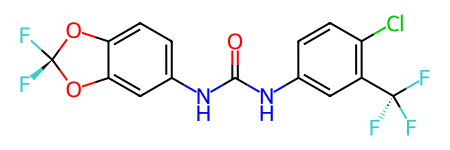

In [6]:
pk150

# Class

## Load class

In [7]:
#       0                  1                2                    3              4
R   = ['apo_nsub'  ,'apo_nsub_F67A'  ,'apo_nsub_Y75A'  ,'apo_nsub_F158A'  ,'apo_nsub_3A']     # 0
RL  = ['pk150_nsub','pk150_nsub_F67A','pk150_nsub_Y75A','pk150_nsub_F158A','pk150_nsub_3A']   # 1 
RS  = ['apo'       ,'apo_F67A'       ,'apo_Y75A'       ,'apo_F158A'       ,'apo_3A']          # 2 
RSL = ['pk150'     ,'pk150_F67A'     ,'pk150_Y75A'     ,'pk150_F158A'     ,'pk150_3A']        # 3

In [8]:
mutations = ['wt','F67A','Y75A','F158A','3A']
result_path = '../traj/analysis/'
results = [] 
dfs     = []
for names in [R,RS,RL,RSL]:
    result = []
    df     = []
    for i_name,name in enumerate(names):
        result_i = pickle.load(open(result_path+name+'.pkl', 'rb'))
        result.append(result_i)
        # The same system should contain the same numbers of column
        ddf = result_i.df
        ddf['mutation'] = mutations[i_name]
        df.append(ddf)
    dfs.append(pd.concat(df))
    results.append(result)
        

/tmp/ipykernel_2874996/1671252085.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfs.append(pd.concat(df))
/tmp/ipykernel_2874996/1671252085.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfs.append(pd.concat(df))
/tmp/ipykernel_2874996/1671252085.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavio

In [9]:
# DataFrame for analysis
df_R = dfs[0]
df_RS = dfs[1]
df_RL = dfs[2]
df_RSL = dfs[3]
# results for RMSF
result_R   = results[0]
result_RS  = results[1]
result_RL  = results[2]
result_RSL = results[3]

In [10]:
mutations = ['wt', 'F67A', 'Y75A', 'F158A','3A']

# WT

In [11]:
R_wt = df_R[df_R['mutation']=='wt']
RS_wt = df_RS[df_RS['mutation']=='wt']

## RMSF SS

In [12]:
holo_pdb = './holo.pdb'
holo_traj = pt.load(holo_pdb)
ss = pt.dssp(holo_traj,simplified=True)[1][0][:179] # SpsB has only 179 residues, the rest are from the substrate
# Classify
Helix = [ss=='H']
Strand = [ss=='E']
Coil = [ss=='C']
df_ss = pd.DataFrame(np.concatenate([Helix,Strand,Coil]).T)
df_ss.replace(False, np.nan, inplace=True)
df_ss.replace(True, 0, inplace=True) 
df_ss.index +=1 # residue ID starts from 1

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='residue ID', ylabel='SpsB RMSF ($\\AA$)'>

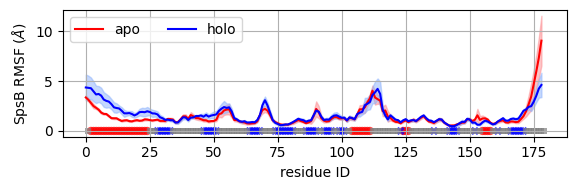

In [13]:
ylabel = 'SpsB RMSF ($\AA$)'

fig, axs = plt.subplots(1,1,figsize=(6,2))

# apo
rmsf = [d[:,1] for d in result_R[0].RMSF_rec]
avg, std = np.average(rmsf,axis=0), np.std(rmsf,axis=0)
axs.plot(avg,color='r',label='apo')
axs.fill_between(x=np.arange(len(avg)),y1=avg-std,y2=avg+std,color=R_color,alpha=0.5)
# holo
rmsf = [d[:,1] for d in result_RS[0].RMSF_rec]
avg, std = np.average(rmsf,axis=0)[:len(df_ss)], np.std(rmsf,axis=0)[:len(df_ss)]
axs.plot(avg,color='b',label='holo')
axs.fill_between(x=np.arange(len(avg)),y1=avg-std,y2=avg+std,color=RS_color,alpha=0.5)

axs.set_xlabel('residue ID')
axs.set_ylabel('SpsB RMSF ($\AA$)')

axs.grid()


axs.legend(ncol=3)
plt.tight_layout()
sns.scatterplot(data= df_ss,legend=False,palette={0: 'red', 1: 'blue', 2: 'gray'},linewidth=0, alpha = 0.7) # Avoid colorblind confusion? 
#filename = './Figure1_wt/Protein_RMSF_wt.svg'
#plt.savefig(filename)

## Pocket Detection

In [14]:
pocket_colors = ['orange','gray']
wt_colors = [R_color,RS_color] # apo, holo

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

apo water_pocket 229.03858817400365 117.18875037439847
holo water_pocket 290.74783756345175 101.62171497455431
apo substrate_pocket 256.58312557924006 105.70780697845646
holo substrate_pocket 417.4210414580412 86.69464804124577


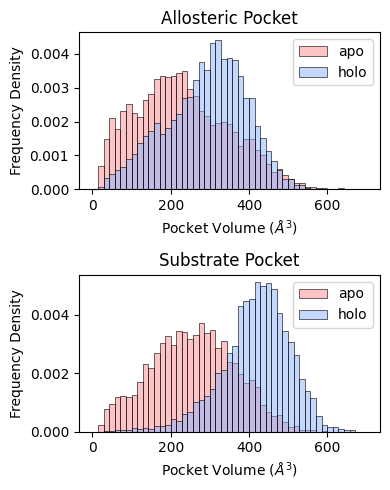

In [15]:
# Distribution
fig, axs = plt.subplots(2,1,figsize=(4,5))
bins = np.linspace(0,700,50)
systems = ['apo_nsub','apo']
systems = [R_wt,RS_wt]
labels  = ['apo','holo']
pockets = ['water_pocket', 'substrate_pocket']
titles = ['Allosteric Pocket','Substrate Pocket']
for i_pocket, pocket in enumerate(pockets):
    for i_sys, sys in enumerate(systems):
        y = sys[pocket].values
        y = y[y!=0]
        sns.histplot(y,color=wt_colors[i_sys],bins=bins,
                         stat='density',ax=axs[i_pocket],alpha=0.5,label=labels[i_sys])
        print(labels[i_sys],pocket,np.average(y),np.std(y))
    axs[i_pocket].set_xlabel('Pocket Volume ($\AA ^3$)')
    axs[i_pocket].set_ylabel('Frequency Density')
    axs[i_pocket].set_title(titles[i_pocket])
    axs[i_pocket].legend()
plt.tight_layout()
#filename = './Figure2_pocket/pocket_hist.svg'
#plt.savefig(filename)

### Correlation with F67, Y75, F158

In [16]:
R_wt =df_R[df_R['mutation']=='wt']
RS_wt = df_RS[df_RS['mutation']=='wt']
bins = np.linspace(0,900,50)

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

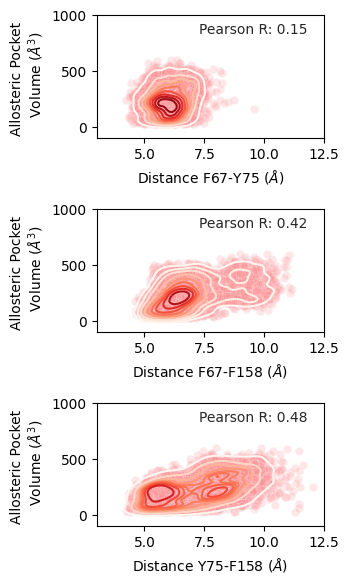

In [17]:
fig, axs = plt.subplots(3,1,figsize=(3.5,6))
R_wt = R_wt[R_wt['water_pocket']!=0] 
x_vars=["distance_F67_Y75", "distance_F67_F158", "distance_Y75_F158"]
x_labels = ['F67-Y75','F67-F158','Y75-F158']
for i_x,x in enumerate(x_vars):
    create_jointplot_correlation(x, 'water_pocket', R_wt,axs[i_x],
                                 xlabel='Distance '+x_labels[i_x]+' ($\AA$)',
                                 ylabel='Allosteric Pocket \n Volume ($\AA^3$)',
                                cmap='Reds',color=R_color)
    axs[i_x].set_xlim(3,12.5)
    axs[i_x].set_ylim(-100,1000)
plt.tight_layout()
filename='./Corr_ring_water_pocket_R.png'
plt.savefig(filename)

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

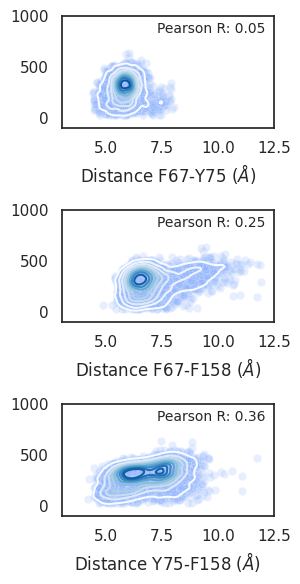

In [19]:
fig, axs = plt.subplots(3,1,figsize=(3,6))

RS_wt = RS_wt[RS_wt['water_pocket']!=0] 
x_vars=["distance_F67_Y75", "distance_F67_F158", "distance_Y75_F158"]
for i_x,x in enumerate(x_vars):
    create_jointplot_correlation(x, 'water_pocket', RS_wt,axs[i_x],
                                 xlabel='Distance '+x_labels[i_x]+' ($\AA$)',
                                 ylabel=None,
                                cmap='Blues',color=RS_color)
    axs[i_x].set_xlim(3,12.5)
    axs[i_x].set_ylim(-100,1000)

plt.tight_layout()
filename='./Corr_ring_water_pocket_RL.png'
plt.savefig(filename)

## Water vs Catalytic

In [20]:
x0=1.2
y0=2.5

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

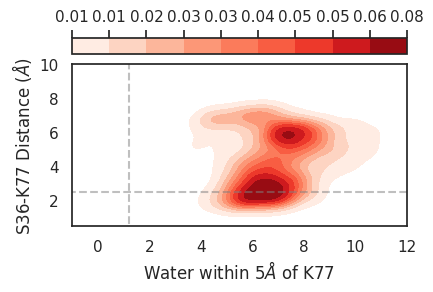

In [21]:
# jointplot
xlabel = water_label
ylabel = hbond_label
fig = plt.figure(figsize=(4.5, 3))
# apo
x = R_wt.water.values
y = R_wt.distance_S36_K77.values

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.tight_layout()
im = sns.kdeplot(x=sliding_average(x),y=sliding_average(y),fill=True,cmap='Reds',cbar=True, cbar_kws={"use_gridspec":False, "location":"top","format": '%.2f'})
plt.plot([x0,x0],[0,10],color='gray',ls='--',alpha=0.5)
plt.plot([-2,12],[y0,y0],color='gray',ls='--',alpha=0.5)
plt.xlim(-1,12)
plt.ylim(0.5,10)
filename='./Water_hbond_correaltion_R_wt.svg'
plt.savefig(filename)


In [22]:
geo1 = [sliding_average(x)[i] < x0 and sliding_average(y)[i] < y0 for i in range(len(x)-4)]
geo2 = [sliding_average(x)[i] < x0 and sliding_average(y)[i] >= y0 for i in range(len(x)-4)]
geo3 = [sliding_average(x)[i] >= x0 and sliding_average(y)[i] < y0 for i in range(len(x)-4)]
geo4 = [sliding_average(x)[i] >= x0 and sliding_average(y)[i] >= y0 for i in range(len(x)-4)]
print(np.average(geo1))
print(np.average(geo2))
print(np.average(geo3))
print(np.average(geo4))

0.0
0.0
0.1867014341590613
0.8132985658409387


/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

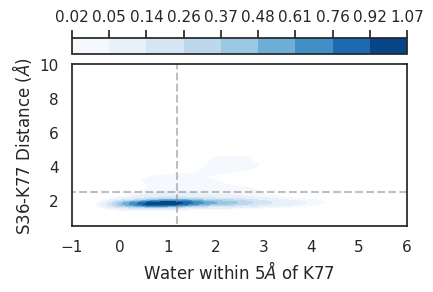

In [23]:
xlabel = water_label
ylabel = hbond_label
fig = plt.figure(figsize=(4.5, 3))
x = RS_wt.water.values
y = RS_wt.distance_S36_K77.values
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.tight_layout()
im = sns.kdeplot(x=sliding_average(x),y=sliding_average(y),fill=True,cmap='Blues',cbar=True, cbar_kws={"use_gridspec":False, "location":"top","format": '%.2f'})
plt.plot([x0,x0],[0,10],color='gray',ls='--',alpha=0.5)
plt.plot([-2,12],[y0,y0],color='gray',ls='--',alpha=0.5)
plt.xlim(-1,6)
plt.ylim(0.5,10)

filename='./Water_hbond_correaltion_RS_wt.svg'
plt.savefig(filename)


In [24]:
geo1 = [sliding_average(x)[i] < x0 and sliding_average(y)[i] < y0 for i in range(len(x)-4)]
geo2 = [sliding_average(x)[i] < x0 and sliding_average(y)[i] >= y0 for i in range(len(x)-4)]
geo3 = [sliding_average(x)[i] >= x0 and sliding_average(y)[i] < y0 for i in range(len(x)-4)]
geo4 = [sliding_average(x)[i] >= x0 and sliding_average(y)[i] >= y0 for i in range(len(x)-4)]
print(np.average(geo1))
print(np.average(geo2))
print(np.average(geo3))
print(np.average(geo4))

0.41983336720178827
0.023978866084129243
0.47083926031294454
0.08534850640113797


# PK150

## L-RMSD

In [25]:
RL_wt = df_RL[df_RL['mutation']=='wt']
RSL_wt = df_RSL[df_RSL['mutation']=='wt']


## Water vs Catalytic

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

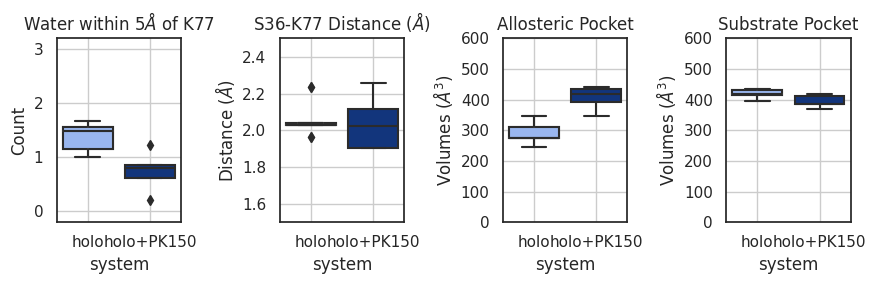

In [27]:
fig, axs = plt.subplots(1,4,figsize=(9,3))
sys_obj   = [RS_wt,RSL_wt]
# sys_color = ['r','gray','blue','gray']
sys_color  = [RS_color,RSL_color]
labels    = ['holo','holo+PK150']
titles    = ['Water within 5$\AA$ of K77','S36-K77 Distance ($\AA$)','Allosteric Pocket','Substrate Pocket']
features = ['water','distance_S36_K77','water_pocket','substrate_pocket']
ylabels   = ['Count','Distance ($\AA$)','Volumes ($\AA^3$)','Volumes ($\AA^3$)']
ylim      =  [[-0.2,3.2],
              [1.5,2.5],
              [ 0, 600],
              [ 0, 600]]
legends = []
def add_legend(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    legends.append((mpatches.Patch(color=color), label))


for i_feature, feature in enumerate(features):
    df = pd.DataFrame(columns=['system','data','data_name'])
    for i_sys, sys in enumerate(sys_obj):
        pos = i_sys
        V = np.zeros(5)
        for run in range(1,6):
        
            y = sys[sys['run']==run][feature]
            y = sliding_average(y)
            if i_feature >  2:
                y = y[y!=0]
            V[run-1] = np.average(y)
            new_row = {'system':labels[i_sys],'data':np.average(y),'data_name':feature}
            df.loc[len(df)] = new_row

            # axs[i_feature].plot(pos, np.average(y), color='k', marker='.',alpha=0.5)
        """
        axs[i_feature].errorbar(x=pos, y=np.average(V), yerr=np.std(V),color=sys_color[i_sys])
        if i_feature ==0: # wt
            # axs[i_feature].plot([-1,9],[np.average(V),np.average(V)],color=sys_color[i_sys],ls='--',alpha=0.6)
            axs[i_feature].plot(pos, np.average(V), color=sys_color[i_sys], marker='o',label=labels[i_sys],markeredgecolor='k')
        else:
            axs[i_feature].plot(pos, np.average(V), color=sys_color[i_sys], marker='o',markeredgecolor='k')
  
        """
        sns.boxplot(data=df, x='system',y='data',ax=axs[i_feature],palette=sys_color)

for i_ax, ax in enumerate(axs):
    ax.set_xlim(-0.5,1.5)
    ax.set_ylim(ylim[i_ax])
    ax.set_ylabel(ylabels[i_ax])
    # ax.set_title(titles[i_ax])
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels,rotation=0)
    ax.set_title(titles[i_ax])
    ax.grid()


# Legend
# axs[0].legend(*zip(*legends), loc=1,ncol=1)
# axs[1].legend(*zip(*legends), loc=1,ncol=2)
plt.tight_layout()
filename = './rev_RS_RLS_catalytic_water_size_box.svg'
plt.savefig(filename)

# Mutation

## Pocket

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

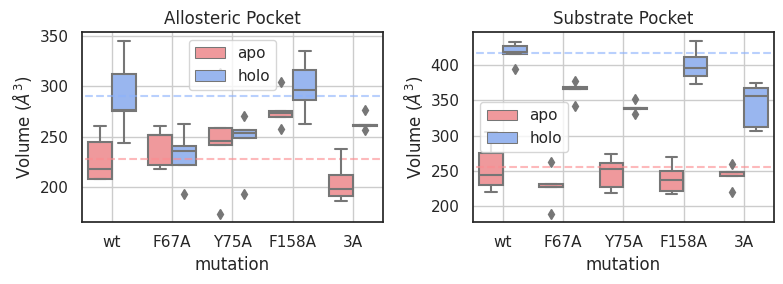

In [28]:
fig, axs = plt.subplots(1,2,figsize=(8,3))
sys_obj   = [df_R,df_RS]
sys_color  = [R_color,RS_color]

#sys_obj   = [df_R,df_RL,df_RS,df_RSL]
#sys_color  = [R_color,RL_color,RS_color,RSL_color]
# sys_color = ['r','gray','blue','gray']
titles    = ['Allosteric Pocket','Substrate Pocket']
labels    = ['apo','holo']
mutations = ['wt','F67A','Y75A','F158A','3A']
pockets = ['water_pocket','substrate_pocket']
legends = []
def add_legend(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    legends.append((mpatches.Patch(color=color), label))

for i_pocket, pocket in enumerate(pockets):
    df = pd.DataFrame(columns=['system','data','mutation'])
    for i_sys, sys in enumerate(sys_obj):
        for i_mut, mut in enumerate(mutations):
            pos = i_mut*2 -0.75 +0.5*(i_sys+1)
            V = np.zeros(5)
            for run in range(1,6):
                y = sys[sys['mutation']==mut]
                y = y[y['run']==run][pocket]
                y = y[y!=0]
                V[run-1] = np.average(y)
                new_row = {'system':labels[i_sys],'data':np.average(y),'mutation':mutations[i_mut]}
                df.loc[len(df)] = new_row
                # axs[i_pocket].errorbar(x=pos, y=np.average(y), yerr=np.std(y),color=sys_color[i_sys])
                # axs[i_pocket].plot(pos, np.average(y), color='k', marker='.',alpha=0.5)
            # axs[i_pocket].errorbar(x=pos, y=np.average(V), yerr=np.std(V),color=sys_color[i_sys])
            
            if i_mut ==0: # wt
                axs[i_pocket].plot([-1,9],[np.average(V),np.average(V)],color=sys_color[i_sys],ls='--',alpha=0.6)
            #    axs[i_pocket].plot(pos, np.average(V), color=sys_color[i_sys], marker='o',label=labels[i_sys],markeredgecolor='k')
            # else:
            #    axs[i_pocket].plot(pos, np.average(V), color=sys_color[i_sys], marker='o',markeredgecolor='k')
    sns.boxplot(df,x='mutation',y='data',hue='system',ax=axs[i_pocket],palette=sys_color)

for i_ax, ax in enumerate(axs):
    # ax.set_ylim(0,750)
    ax.set_ylabel('Volume ($\AA ^3$)')
    ax.set_title(titles[i_ax])
    # ax.set_xticks(np.arange(len(mutations))*2)
    # ax.set_xticklabels(mutations)
    ax.grid()

# Legend
axs[0].legend(*zip(*legends))# , loc=1,ncol=2)
axs[1].legend(*zip(*legends))#, loc=1,ncol=2)

# axs[1].legend(*zip(*legends), loc=1,ncol=2)
plt.tight_layout()
filename = './Rev_R_RS_pocket_size_boxplot.svg'
plt.savefig(filename)

## Water catalytic

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

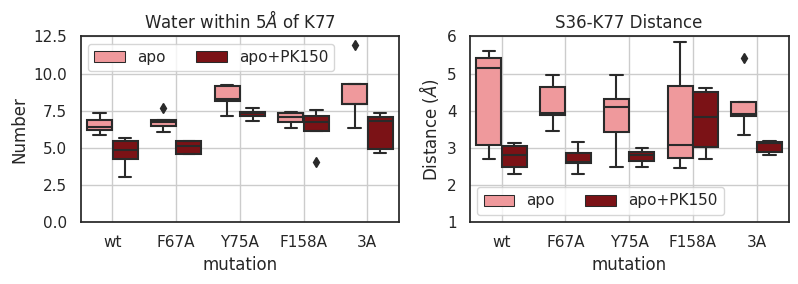

In [29]:
fig, axs = plt.subplots(1,2,figsize=(8,3))
sys_obj   = [df_R,df_RL]
sys_color  = [R_color,RL_color]

titles    = ['Water within 5$\AA$ of K77','S36-K77 Distance']
labels    = ['apo','apo+PK150']
mutations = ['wt','F67A','Y75A','F158A','3A']
features = ['water','distance_S36_K77']
ylims     = [[0,12.5],[1,6]]
ylabels   = ['Number','Distance ($\AA$)']
def add_legend(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    legends.append((mpatches.Patch(color=color), label))

for i_feature, feature in enumerate(features):
    df = pd.DataFrame(columns=['system','data','mutation'])
    for i_sys, sys in enumerate(sys_obj):
        for i_mut, mut in enumerate(mutations):
            pos = i_mut*2 -0.75 +0.5*(i_sys+1)
            V = np.zeros(5)
            for run in range(1,6):
                y = sys[sys['mutation']==mut]
                y = y[y['run']==run][feature]
                V[run-1] = np.average(y)
                new_row = {'system':labels[i_sys],'data':np.average(y),'mutation':mutations[i_mut]}
                df.loc[len(df)] = new_row
                # axs[i_pocket].errorbar(x=pos, y=np.average(y), yerr=np.std(y),color=sys_color[i_sys])
                # axs[i_feature].plot(pos, np.average(y), color='k', marker='.',alpha=0.5)
            # axs[i_feature].errorbar(x=pos, y=np.average(V), yerr=np.std(V),color=sys_color[i_sys])
            # if i_mut ==0: # wt
            #    axs[i_feature].plot([-1,5],[np.average(V),np.average(V)],color=sys_color[i_sys],ls='--',alpha=0.6)
            #    axs[i_feature].plot(pos, np.average(V), color=sys_color[i_sys], marker='o',label=labels[i_sys],markeredgecolor='k')
            #else:
            #    axs[i_feature].plot(pos, np.average(V), color=sys_color[i_sys], marker='o',markeredgecolor='k')
            
    sns.boxplot(df,x='mutation',y='data',hue='system',ax=axs[i_feature],palette=sys_color)
for i_ax, ax in enumerate(axs):
    ax.set_ylim(ylims[i_ax])
    ax.set_ylabel(ylabels[i_ax])
    ax.set_title(titles[i_ax])
    #ax.set_xticks(np.arange(len(mutations))*2)
    #ax.set_xticklabels(mutations)
    ax.grid()

# Legend
axs[0].legend(ncol=2)
axs[1].legend(ncol=2)
# axs[0].legend(*zip(*legends),ncol=2)
# axs[1].legend(*zip(*legends), loc=1,ncol=2)
plt.tight_layout()
#filename = './Figure4_mutation/R_RS_pocket_size_violinplot.svg'
filename = './SI_apo_mut_water.svg'
plt.savefig(filename)

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

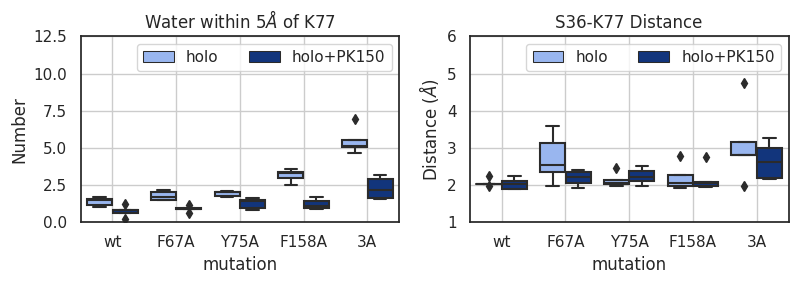

In [30]:
fig, axs = plt.subplots(1,2,figsize=(8,3))
sys_obj   = [df_RS,df_RSL]
sys_color  = [RS_color,RSL_color]

titles    = ['Water within 5$\AA$ of K77','S36-K77 Distance']
labels    = ['holo','holo+PK150']
mutations = ['wt','F67A','Y75A','F158A','3A']
features = ['water','distance_S36_K77']
ylims     = [[0,12.5],[1,6]]
ylabels   = ['Number','Distance ($\AA$)']
def add_legend(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    legends.append((mpatches.Patch(color=color), label))
for i_feature, feature in enumerate(features):
    df = pd.DataFrame(columns=['system','data','mutation'])
    for i_sys, sys in enumerate(sys_obj):
        for i_mut, mut in enumerate(mutations):
            pos = i_mut*2 -0.75 +0.5*(i_sys+1)
            V = np.zeros(5)
            for run in range(1,6):
                y = sys[sys['mutation']==mut]
                y = y[y['run']==run][feature]
                V[run-1] = np.average(y)
                new_row = {'system':labels[i_sys],'data':np.average(y),'mutation':mutations[i_mut]}
                df.loc[len(df)] = new_row
                # axs[i_pocket].errorbar(x=pos, y=np.average(y), yerr=np.std(y),color=sys_color[i_sys])
                # axs[i_feature].plot(pos, np.average(y), color='k', marker='.',alpha=0.5)
            # axs[i_feature].errorbar(x=pos, y=np.average(V), yerr=np.std(V),color=sys_color[i_sys])
            # if i_mut ==0: # wt
            #    axs[i_feature].plot([-1,5],[np.average(V),np.average(V)],color=sys_color[i_sys],ls='--',alpha=0.6)
            #    axs[i_feature].plot(pos, np.average(V), color=sys_color[i_sys], marker='o',label=labels[i_sys],markeredgecolor='k')
            #else:
            #    axs[i_feature].plot(pos, np.average(V), color=sys_color[i_sys], marker='o',markeredgecolor='k')
            
    sns.boxplot(df,x='mutation',y='data',hue='system',ax=axs[i_feature],palette=sys_color)

for i_ax, ax in enumerate(axs):
    ax.set_ylim(ylims[i_ax])
    ax.set_ylabel(ylabels[i_ax])
    ax.set_title(titles[i_ax])
    #ax.set_xticks(np.arange(len(mutations))*2)
    #ax.set_xticklabels(mutations)
    ax.grid()

# Legend
# axs[0].legend(*zip(*legends),ncol=2)
axs[0].legend(ncol=2)
axs[1].legend(ncol=2)

# axs[1].legend(*zip(*legends), loc=1,ncol=2)
plt.tight_layout()
#filename = './Figure4_mutation/R_RS_pocket_size_violinplot.svg'
filename = './SI_holo_mut_water.svg'
plt.savefig(filename)

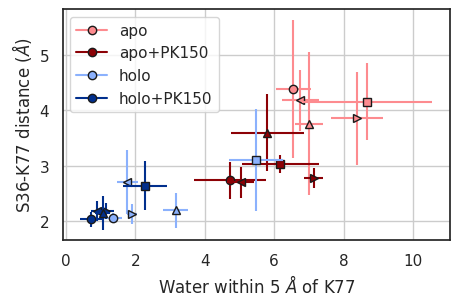

In [31]:
fig, axs = plt.subplots(1,1,figsize=(5,3))
sys_obj   = [df_R,df_RL,df_RS,df_RSL]
sys_color  = [R_color,RL_color,RS_color,RSL_color]

titles    = ['Water within 5$\AA$ of K77','S37-K77 Distance']
labels    = ['apo','apo+PK150','holo','holo+PK150']
mutations = ['wt','F67A','Y75A','F158A','3A']
features = ['water','distance_S36_K77']
legends = []
markers  = ['o','<','>','^','s']
ylabels   = ['Number','Distance ($\AA$)']
ylims     = [[0,12.5],[1,6]]
legends = []
def add_legend(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    legends.append((mpatches.Patch(color=color), label))

Dx = []
Dy = []
for i_sys, sys in enumerate(sys_obj):
    for i_mut, mut in enumerate(mutations):
        
        X = np.zeros(5)
        Y = np.zeros(5)
        for run in range(1,6):
            y = sys[sys['mutation']==mut]
            if i_sys in [1,3]:
                y = y[y['RMSD_lig']< 15]
            X[run-1] = np.average(y[y['run']==run][features[0]])
            Y[run-1] = np.average(y[y['run']==run][features[1]])
            # axs[i_feature].plot(pos, np.average(y), color='k', marker='.',alpha=0.1)
        plt.errorbar(x=np.average(X), y=np.average(Y),
                                xerr=np.std(X) , yerr=np.std(Y)  ,color=sys_color[i_sys])
        if i_mut ==0:
            label =  labels[i_sys] # mutations[i_mut]
        else:
            label = None # mutations[i_mut]
        plt.plot(np.average(X), np.average(Y), color=sys_color[i_sys], marker=markers[i_mut],label=label,markeredgecolor='k')
        # if i_sys==0:
        #     plt.text(np.average(X)-0.5,np.average(Y)-0.25,mutations[i_mut])
        Dx.append(np.average(X))
        Dy.append(np.average(Y))
plt.legend(ncol=1)
plt.grid()
plt.xlabel('Water within 5 $\AA$ of K77')
plt.ylabel('S36-K77 distance ($\AA$)')
filename = './SI_water_active_correlation_olrus.svg'
plt.savefig(filename)

## RMSD Ligand pose 1 pose 2

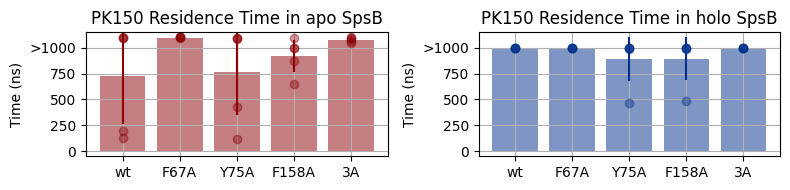

In [284]:
fig, axs = plt.subplots(1,2,figsize=(8,2))
sys_obj   = [df_RL,df_RSL]
sys_color  = [RL_color,RSL_color]
titles    = ['$\pi_{pk150}-\pi_{SpsB}$ Distance','Hbond']
titles   = ['PK150 Residence Time in apo SpsB','PK150 Residence Time in holo SpsB']
ylabels  = ['Time (ns)','Time (ns)']
yticks   = ['0','250','500','750','>1000']
for i_sys, sys in enumerate(sys_obj):
    for i_mut, mut in enumerate(mutations):
        ts = [] # residence time
        for run in range(5):
            y = sys[sys['mutation']==mut]
            y = y[y['run']==run+1]
            r1 = len(y[y['RMSD_lig'] < 15])
            ts.append(r1)

            axs[i_sys].plot(i_mut,r1,marker='o',alpha=0.4,color=sys_color[i_sys])
        axs[i_sys].bar(x=i_mut,height=np.average(ts),color=sys_color[i_sys],alpha=0.5)
        axs[i_sys].errorbar(x=i_mut,y=np.average(ts),yerr=np.std(ts),color=sys_color[i_sys])
        
for i_ax, ax in enumerate(axs):
    ax.set_xticks(np.arange(len(mutations)))
    ax.set_xticklabels(mutations)
    ax.set_yticks(np.arange(0,1001,250))
    ax.set_yticklabels(yticks)
    ax.set_ylabel(ylabels[i_ax])
    ax.set_title(titles[i_ax])
    ax.set_ylim(-50,1150)
    ax.grid()

plt.tight_layout()
filename = './RL_RSL_pk150_residence_time.svg'
plt.savefig(filename)

# Supporting information

## water

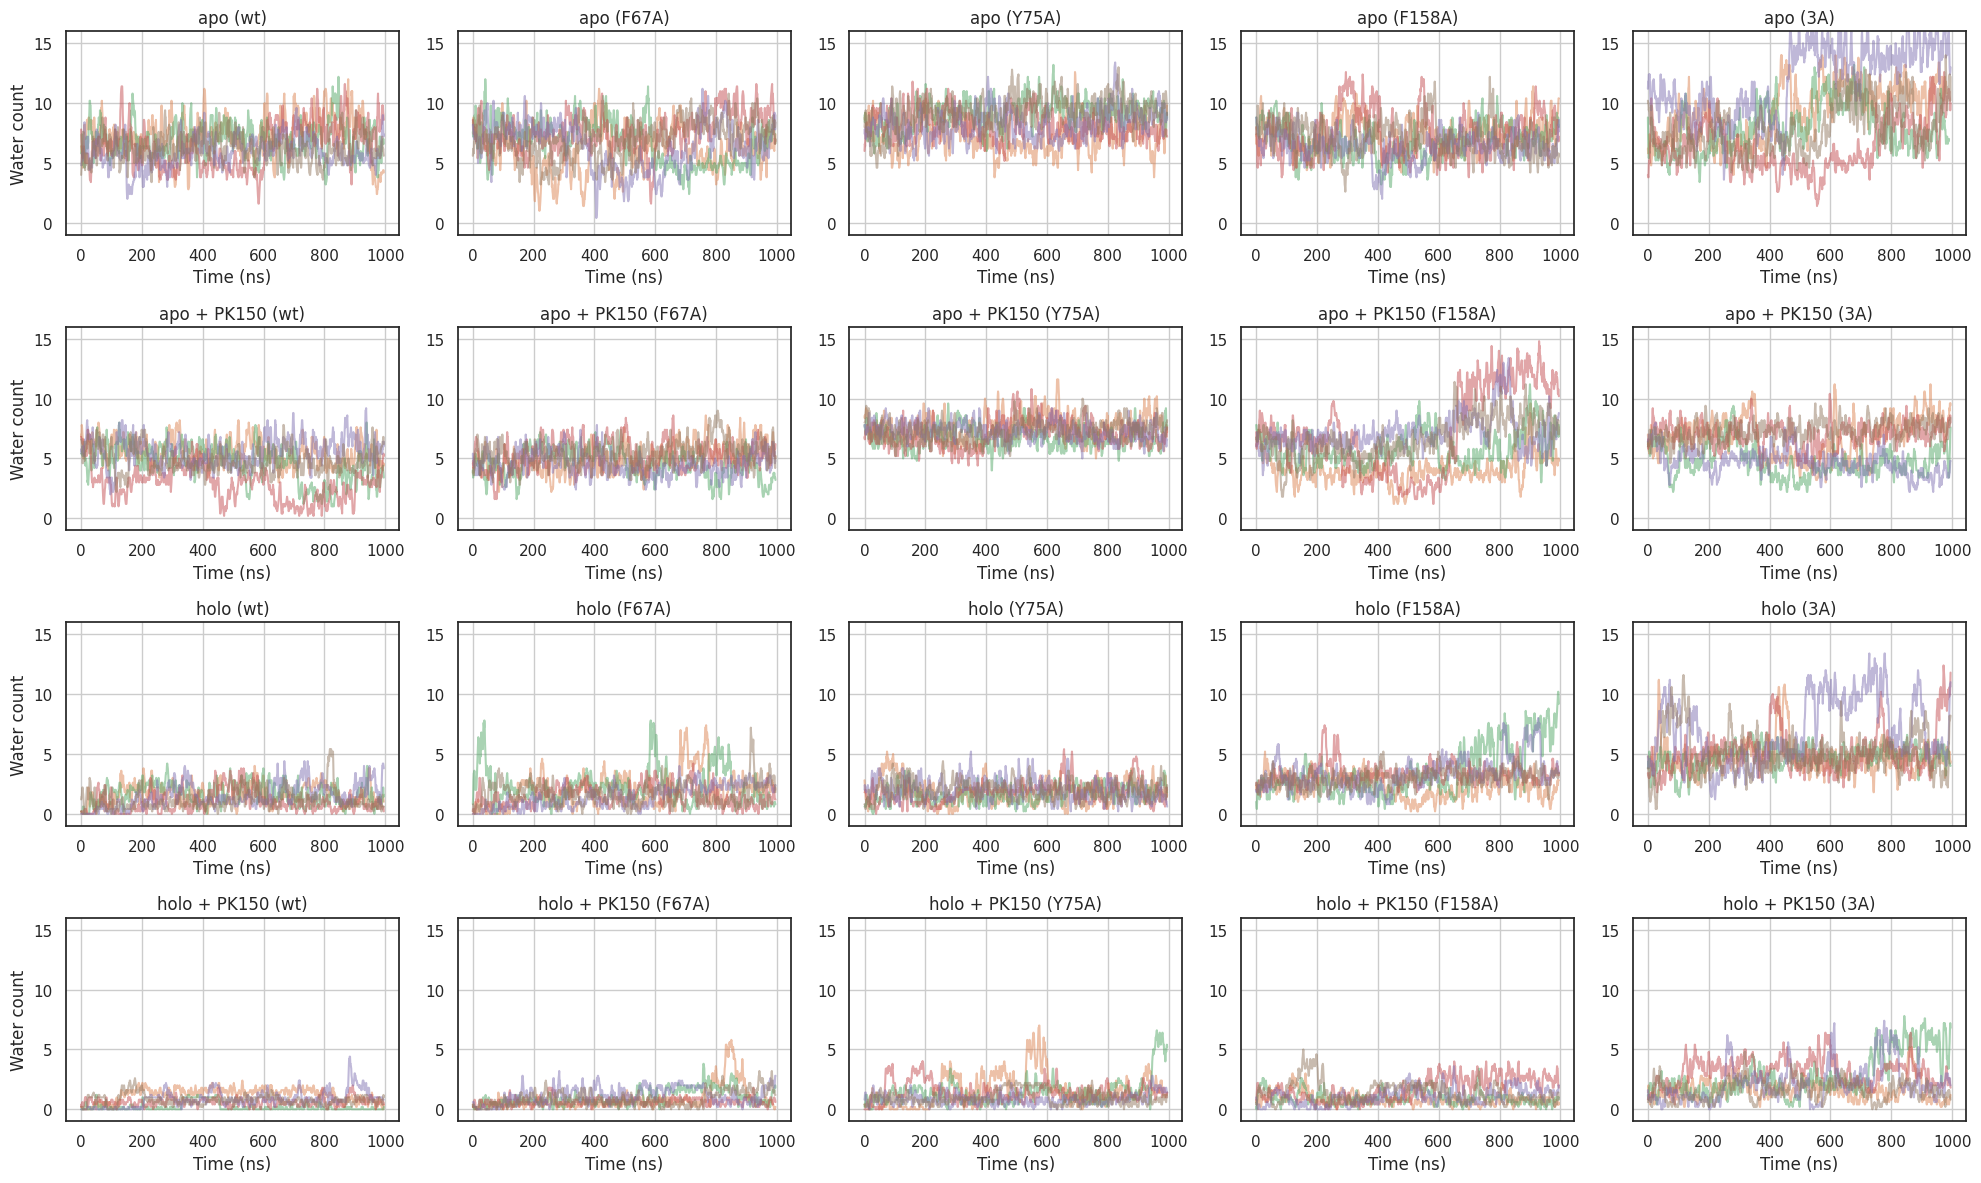

In [58]:
fig, axs = plt.subplots(4,5,figsize=(20,12))

ylabel = 'Water count'
xlabel = 'Time (ns)'

systems = [df_R,df_RL,df_RS,df_RSL]
# systems = [df_RL,df_RSL]
mutations = ['wt','F67A','Y75A','F158A','3A']
titles = ['apo','apo + PK150','holo','holo + PK150']
for i_sys, sys in enumerate(systems):
    for i_mut, mut in enumerate(mutations):
        ax = axs[i_sys][i_mut]
        df = sys[sys['mutation']==mut]
        df = df[df.index < 1000]
        for run in range(1,6):
            df_ = df[df['run']==run]
            x = df_.index[:-4]
            y = sliding_average(df_.water.values)
            # sns.lineplot(data=df, x=df.index, y='substrate_pocket', hue='run',ax=ax,legend=False,alpha=0.6)
            ax.plot(x,y,alpha=0.5,color='C'+str(run))
            
        # sns.lineplot(data=df, x=df.index, y='water', hue='run',ax=ax,legend=False,alpha=0.6)
        ax.grid()
        ax.set_title(titles[i_sys]+' ('+mut+')')
        ax.set_xlabel(xlabel)

        if i_mut ==0: 
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel(None)        
        ax.set_ylim(-1,16)

plt.tight_layout()
filename='./SI_time_WATER.png'
plt.savefig(filename,dpi=150)

### RMSD

#### Receptor RMSD

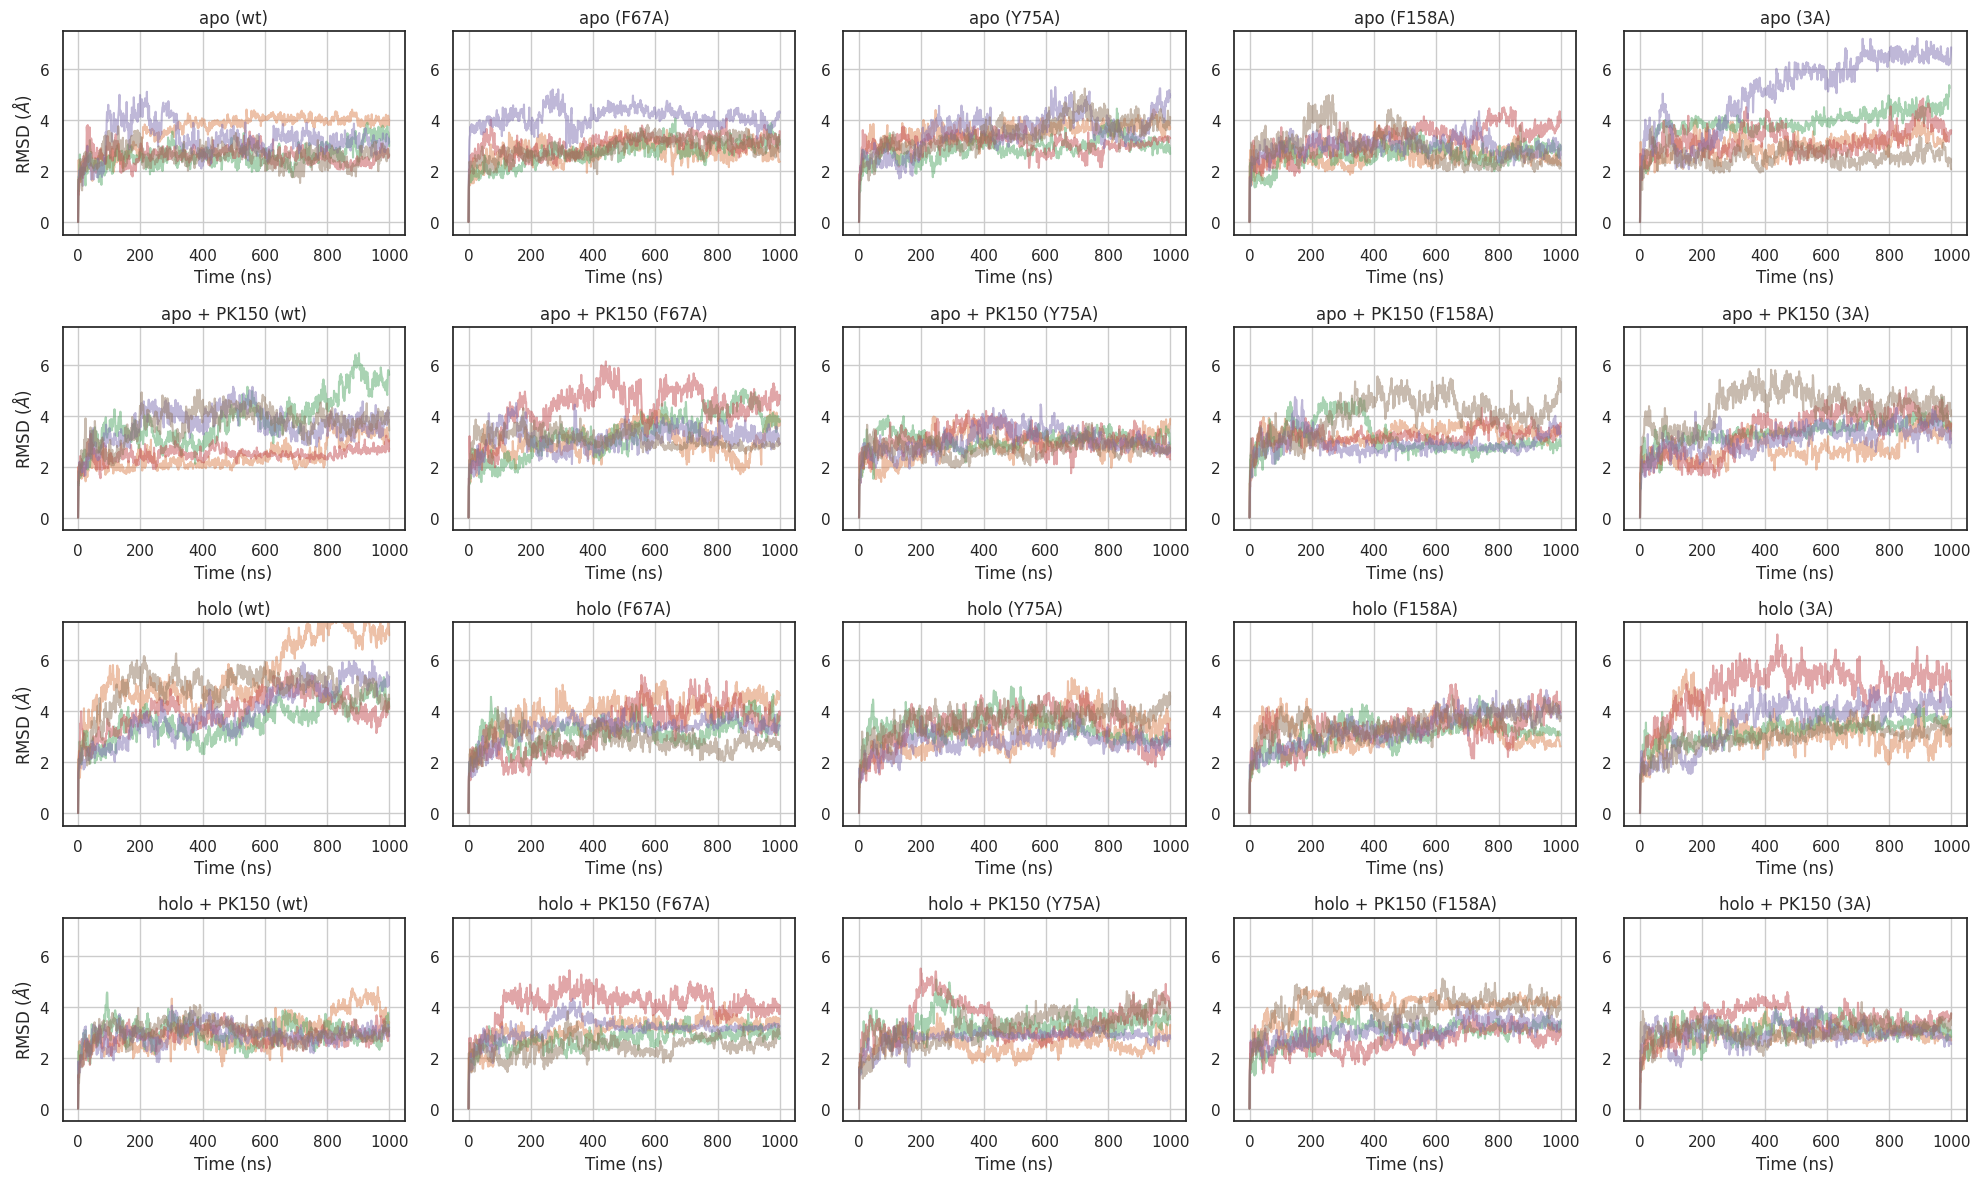

In [59]:
fig, axs = plt.subplots(4,5,figsize=(20,12))

ylabel = 'RMSD ($\AA$)'
xlabel = 'Time (ns)'

systems = [df_R,df_RL,df_RS,df_RSL]
# systems = [df_RL,df_RSL]
mutations = ['wt','F67A','Y75A','F158A','3A']
titles = ['apo','apo + PK150','holo','holo + PK150']
for i_sys, sys in enumerate(systems):
    for i_mut, mut in enumerate(mutations):
        ax = axs[i_sys][i_mut]
        df = sys[sys['mutation']==mut]
        df = df[df.index < 1000]
        for run in range(1,6):
            df_ = df[df['run']==run]
            x = df_.index
            y = df_.RMSD_rec.values
            # sns.lineplot(data=df, x=df.index, y='substrate_pocket', hue='run',ax=ax,legend=False,alpha=0.6)
            ax.plot(x,y,alpha=0.5,color='C'+str(run))
            
        # sns.lineplot(data=df, x=df.index, y='RMSD_rec', hue='run',ax=ax,legend=False,alpha=0.6)
        ax.grid()
        ax.set_title(titles[i_sys]+' ('+mut+')')
        ax.set_xlabel(xlabel)
        if i_mut ==0: 
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel(None)        
        ax.set_ylim(-0.5,7.5)

plt.tight_layout()
filename='./SI_REC_RMSD.png'
plt.savefig(filename,dpi=150)

#### Substrate RMSD

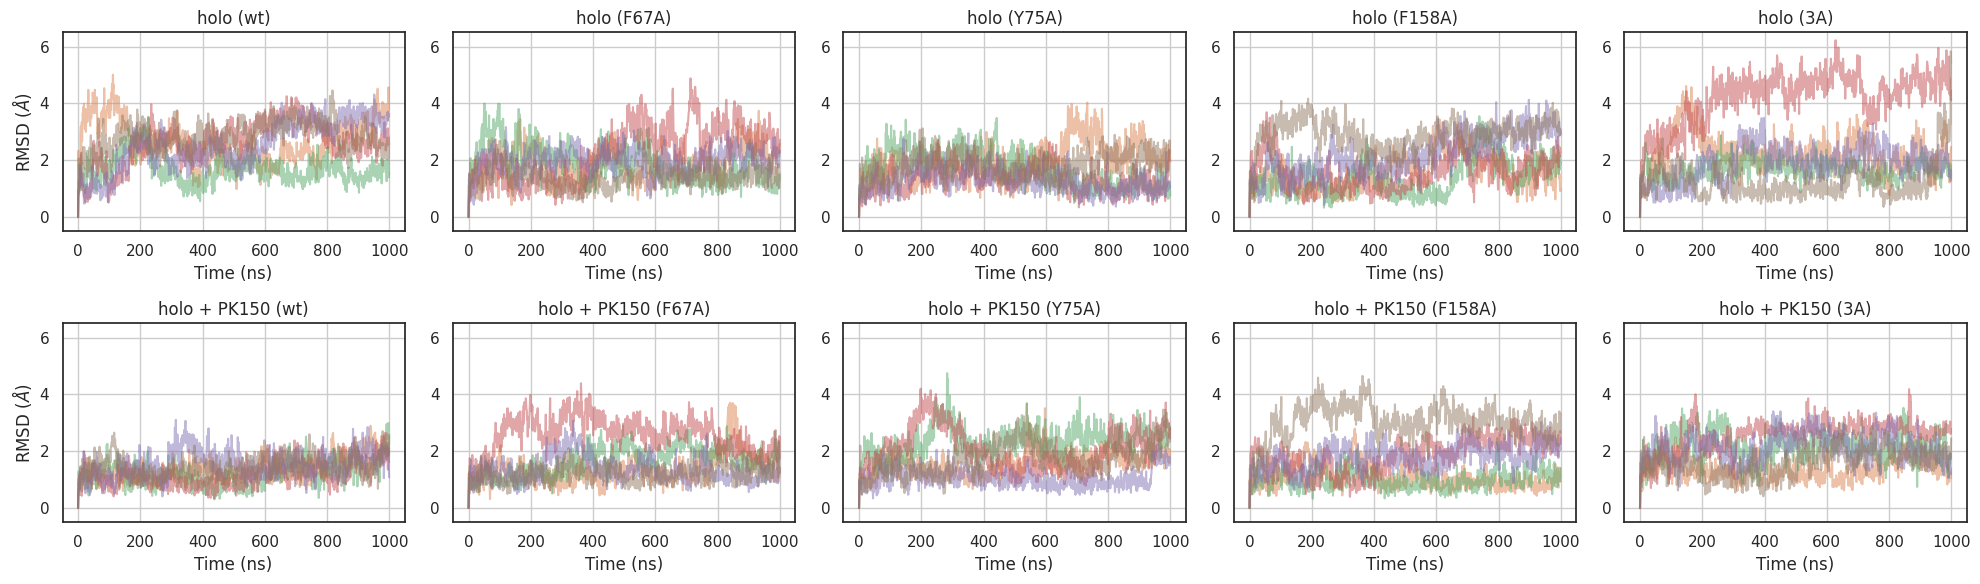

In [60]:
fig, axs = plt.subplots(2,5,figsize=(20,6))

ylabel = 'RMSD ($\AA$)'
xlabel = 'Time (ns)'

systems = [df_RS,df_RSL]
# systems = [df_RL,df_RSL]
mutations = ['wt','F67A','Y75A','F158A','3A']
titles = ['holo','holo + PK150']
for i_sys, sys in enumerate(systems):
    for i_mut, mut in enumerate(mutations):
        ax = axs[i_sys][i_mut]
        df = sys[sys['mutation']==mut]
        df = df[df.index < 1000]
        for run in range(1,6):
            df_ = df[df['run']==run]
            x = df_.index
            y = df_.RMSD_sub.values
            # sns.lineplot(data=df, x=df.index, y='substrate_pocket', hue='run',ax=ax,legend=False,alpha=0.6)
            ax.plot(x,y,alpha=0.5,color='C'+str(run))
            
        # sns.lineplot(data=df, x=df.index, y='RMSD_sub', hue='run',ax=ax,legend=False,alpha=0.6)
        ax.grid()
        ax.set_title(titles[i_sys]+' ('+mut+')')
        ax.set_xlabel(xlabel)

        if i_mut ==0: 
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel(None)  
        ax.set_ylim(-0.5,6.5)


plt.tight_layout()
filename='./SI_SUB_RMSD.png'
plt.savefig(filename,dpi=150)

#### Ligand RMSD

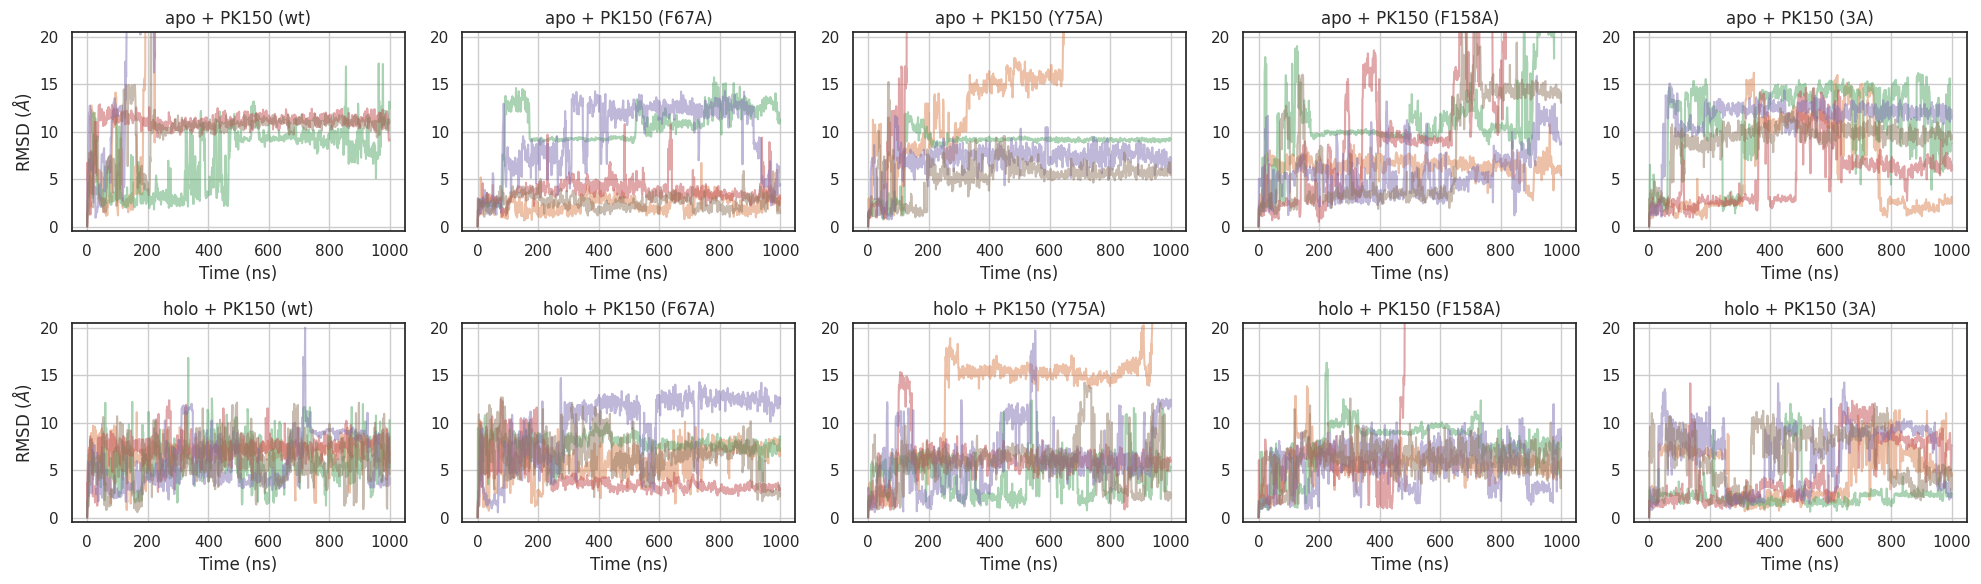

In [61]:
fig, axs = plt.subplots(2,5,figsize=(20,6))

ylabel = 'RMSD ($\AA$)'
xlabel = 'Time (ns)'

# systems = [df_R,df_RL,df_RS,df_RLS]
systems = [df_RL,df_RSL]
mutations = ['wt','F67A','Y75A','F158A','3A']
titles = ['apo + PK150','holo + PK150']
for i_sys, sys in enumerate(systems):
    for i_mut, mut in enumerate(mutations):
        ax = axs[i_sys][i_mut]
        df = sys[sys['mutation']==mut]
        df = df[df.index < 1000]
        for run in range(1,6):
            df_ = df[df['run']==run]
            x = df_.index
            y = df_.RMSD_lig.values
            # sns.lineplot(data=df, x=df.index, y='substrate_pocket', hue='run',ax=ax,legend=False,alpha=0.6)
            ax.plot(x,y,alpha=0.5,color='C'+str(run))
            
            
        # sns.lineplot(data=df, x=df.index, y='RMSD_lig', hue='run',ax=ax,legend=False,alpha=0.6)
        ax.grid()
        ax.set_title(titles[i_sys]+' ('+mut+')')
        ax.set_xlabel(xlabel)
        if i_mut ==0: 
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel(None)        
        ax.set_ylim(-0.5,20.5)

plt.tight_layout()
filename='./SI_PK150_RMSD.png'
plt.savefig(filename,dpi=150)

## Pocket

### Allosteric pocket

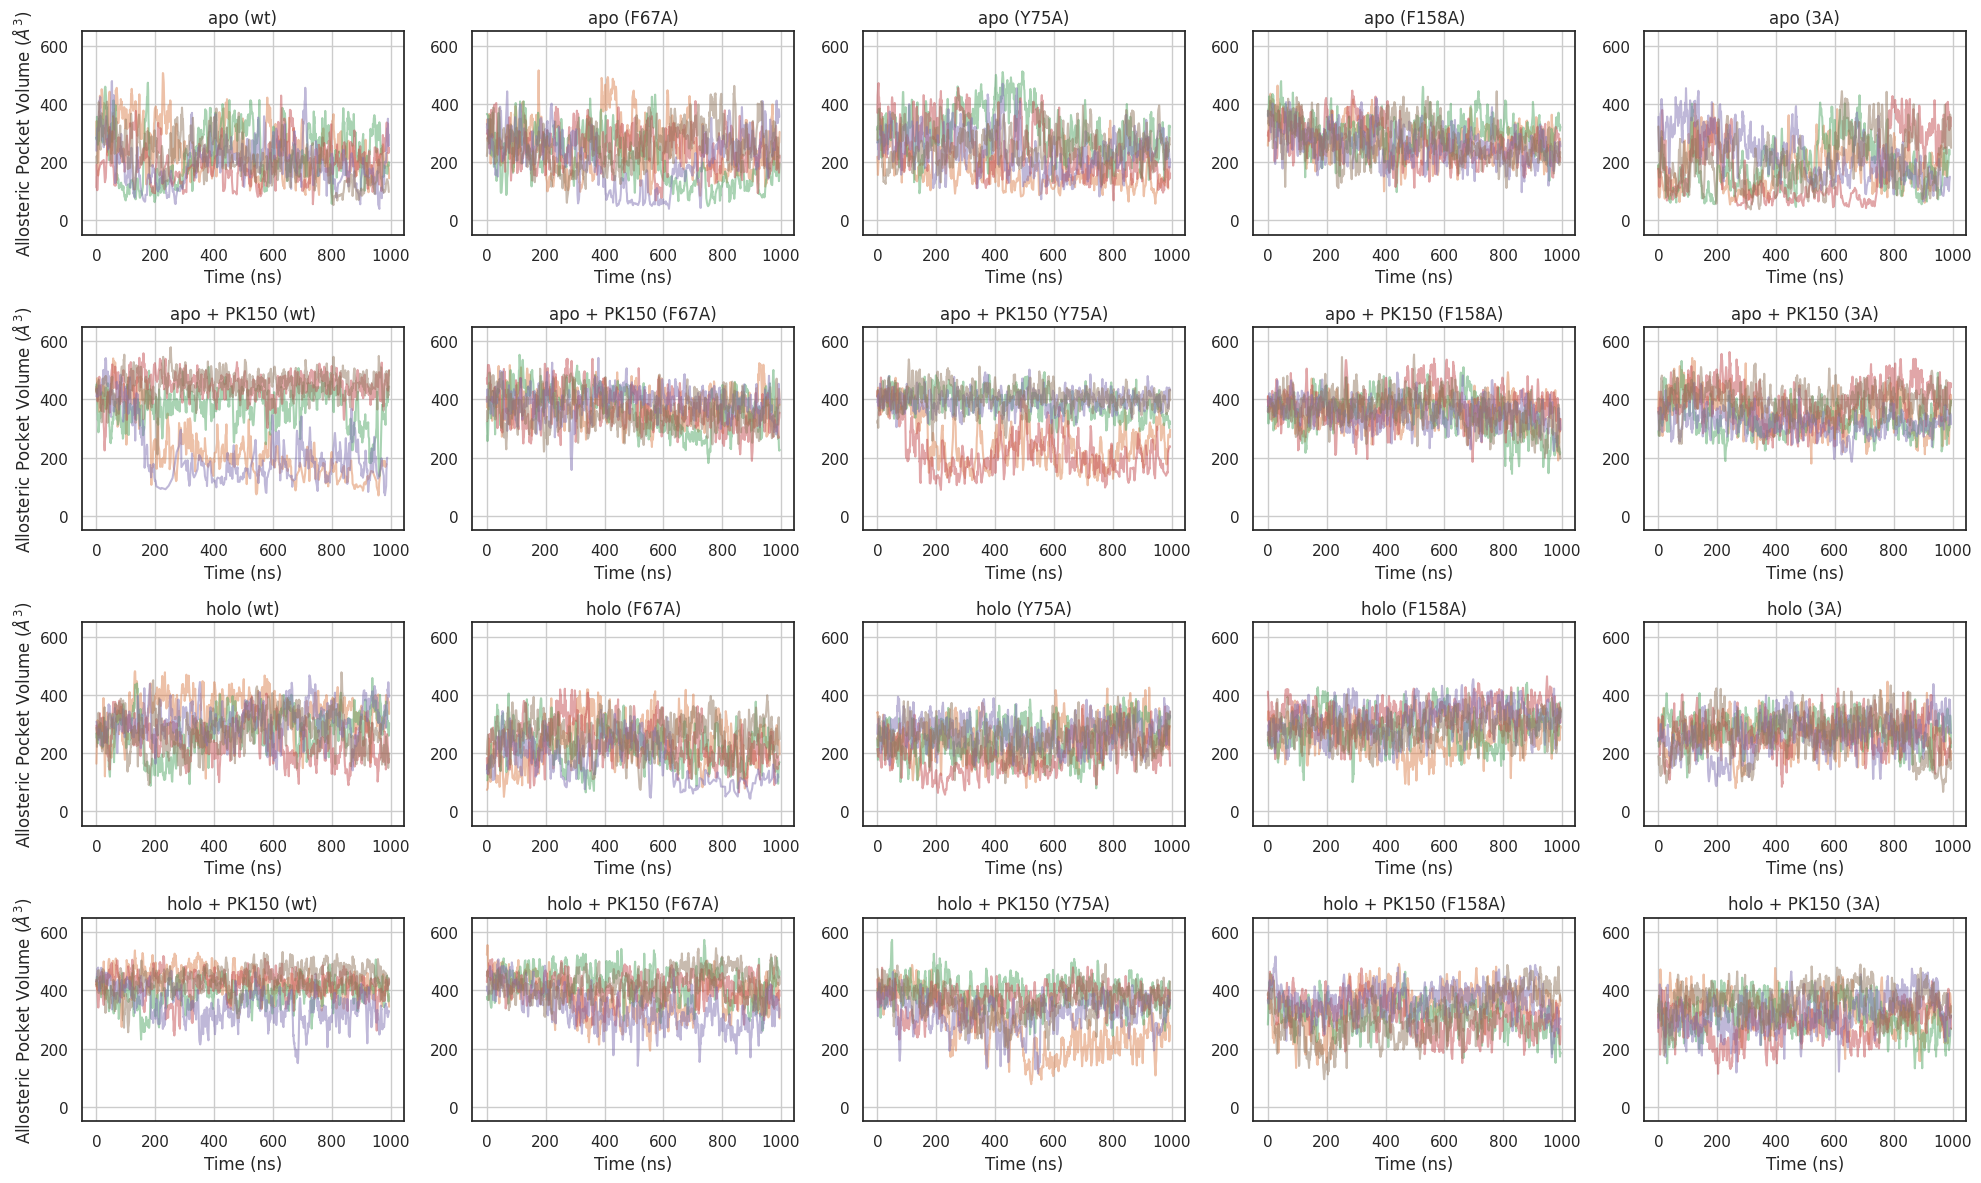

In [62]:
fig, axs = plt.subplots(4,5,figsize=(20,12))

ylabel = 'Allosteric Pocket Volume ($\AA^3$)'
xlabel = 'Time (ns)'

systems = [df_R,df_RL,df_RS,df_RSL]
# systems = [df_RL,df_RSL]
mutations = ['wt','F67A','Y75A','F158A','3A']
titles = ['apo','apo + PK150','holo','holo + PK150']

for i_sys, sys in enumerate(systems):
    for i_mut, mut in enumerate(mutations):
        ax = axs[i_sys][i_mut]
        df = sys[sys['mutation']==mut]
        df = df[df.index < 1000]
        df = df[df.water_pocket.values !=0]
        for run in range(1,6):
            df_ = df[df['run']==run]
            x = df_.index[:-4]
            y = sliding_average(df_.water_pocket.values)
            # sns.lineplot(data=df, x=df.index, y='substrate_pocket', hue='run',ax=ax,legend=False,alpha=0.6)
            ax.plot(x,y,alpha=0.5,color='C'+str(run))
        # sns.lineplot(data=df, x=df.index, y='water_pocket', hue='run',ax=ax,legend=False,alpha=0.6)
        ax.grid()
        ax.set_title(titles[i_sys]+' ('+mut+')')
        ax.set_xlabel(xlabel)
        if i_mut ==0: 
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel(None)        
        ax.set_ylim(-50,650)

plt.tight_layout()
filename='./SI_Allosteric_pocket.png'
plt.savefig(filename,dpi=150)

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed i

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

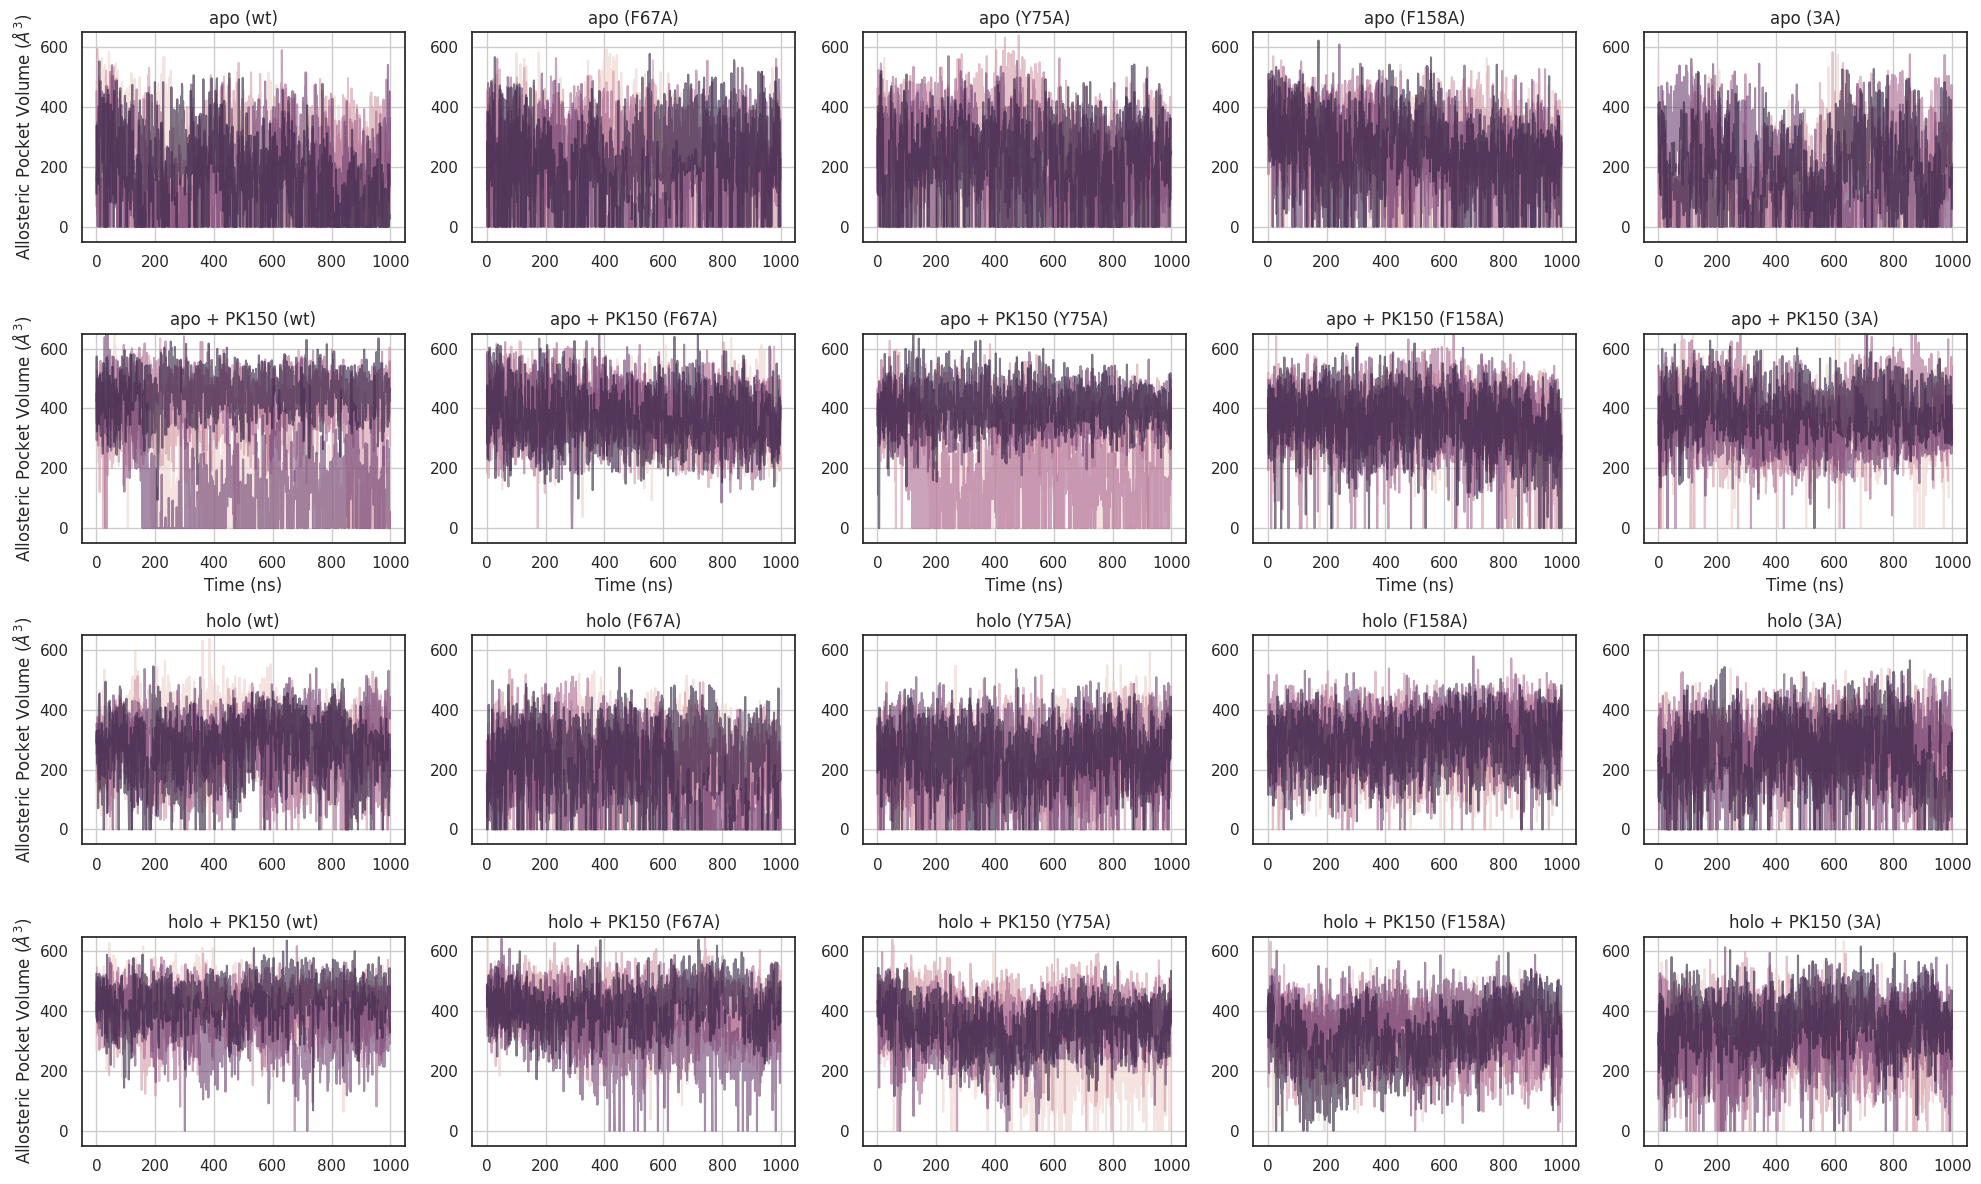

In [63]:
fig, axs = plt.subplots(4,5,figsize=(20,12))

ylabel = 'Allosteric Pocket Volume ($\AA^3$)'
xlabel = 'Time (ns)'

systems = [df_R,df_RL,df_RS,df_RSL]
# systems = [df_RL,df_RSL]
mutations = ['wt','F67A','Y75A','F158A','3A']
titles = ['apo','apo + PK150','holo','holo + PK150']

for i_sys, sys in enumerate(systems):
    for i_mut, mut in enumerate(mutations):
        ax = axs[i_sys][i_mut]
        df = sys[sys['mutation']==mut]
        df = df[df.index < 1000]
        sns.lineplot(data=df, x=df.index, y='water_pocket', hue='run',ax=ax,legend=False,alpha=0.6)
        ax.grid()
        ax.set_title(titles[i_sys]+' ('+mut+')')
        if i_sys ==1:
            ax.set_xlabel(xlabel)
        else:
            ax.set_xlabel(None)
        if i_mut ==0: 
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel(None)        
        ax.set_ylim(-50,650)

plt.tight_layout()
filename='./SI_Allosteric_pocket.png'
plt.savefig(filename,dpi=150)

### Substrate pocket

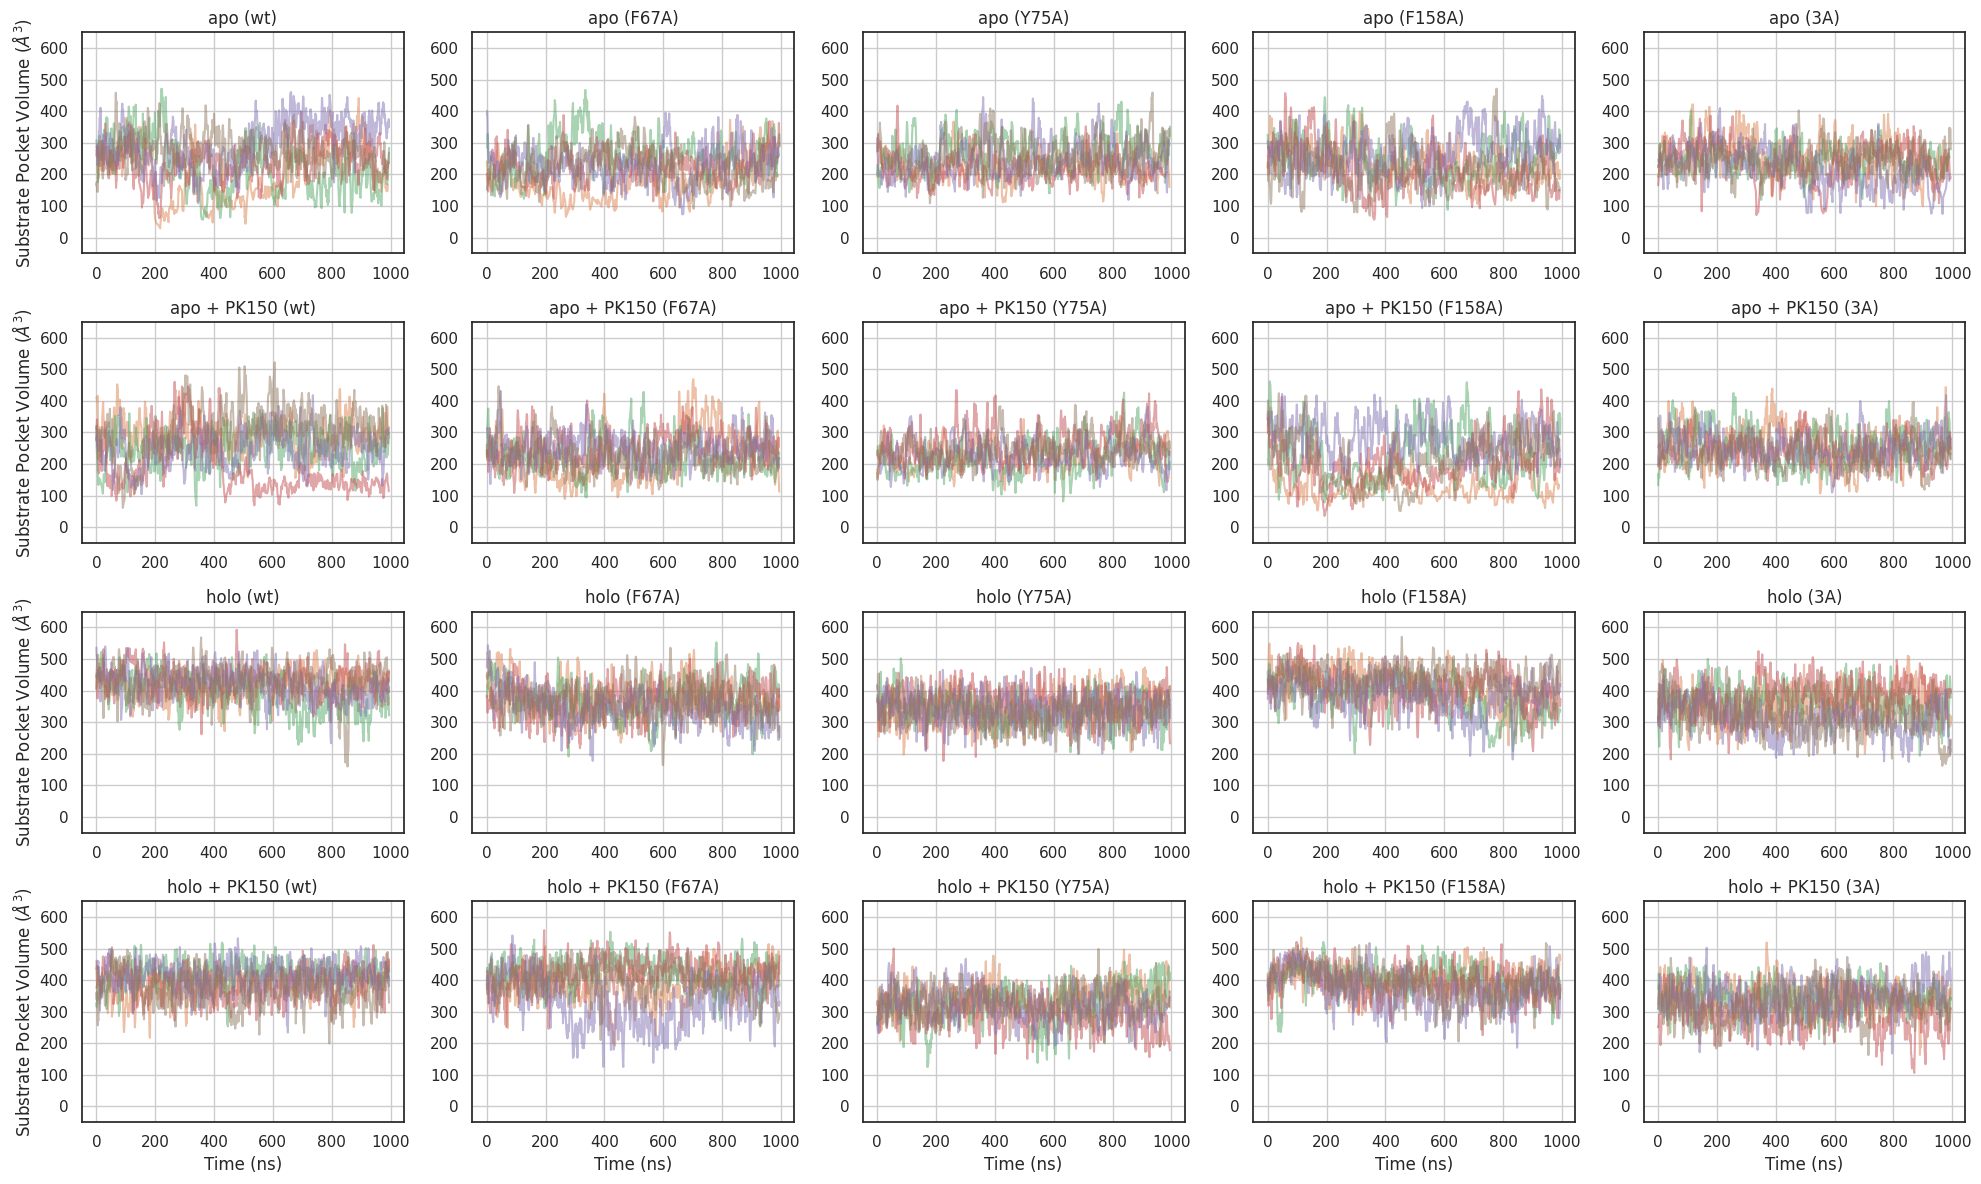

In [64]:
fig, axs = plt.subplots(4,5,figsize=(20,12))

ylabel = 'Substrate Pocket Volume ($\AA^3$)'
xlabel = 'Time (ns)'

systems = [df_R,df_RL,df_RS,df_RSL]
# systems = [df_RL,df_RSL]
mutations = ['wt','F67A','Y75A','F158A','3A']
titles = ['apo','apo + PK150','holo','holo + PK150']

for i_sys, sys in enumerate(systems):
    for i_mut, mut in enumerate(mutations):
        ax = axs[i_sys][i_mut]
        df = sys[sys['mutation']==mut]
        df = df[df.index < 1000]
        df = df[df.substrate_pocket.values !=0]
        for run in range(1,6):
            df_ = df[df['run']==run]
            x = df_.index[:-4]
            y = sliding_average(df_.substrate_pocket.values)
            # sns.lineplot(data=df, x=df.index, y='substrate_pocket', hue='run',ax=ax,legend=False,alpha=0.6)
            ax.plot(x,y,alpha=0.5,color='C'+str(run))
        ax.grid()
        ax.set_title(titles[i_sys]+' ('+mut+')')
        if i_sys == 3:
            ax.set_xlabel(xlabel)
        else:
            ax.set_xlabel(None)
        if i_mut ==0: 
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel(None)        
        ax.set_ylim(-50,650)


plt.tight_layout()
filename='./SI_Substrate_pocket.png'
plt.savefig(filename,dpi=150)

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed i

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed i

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed i

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed i

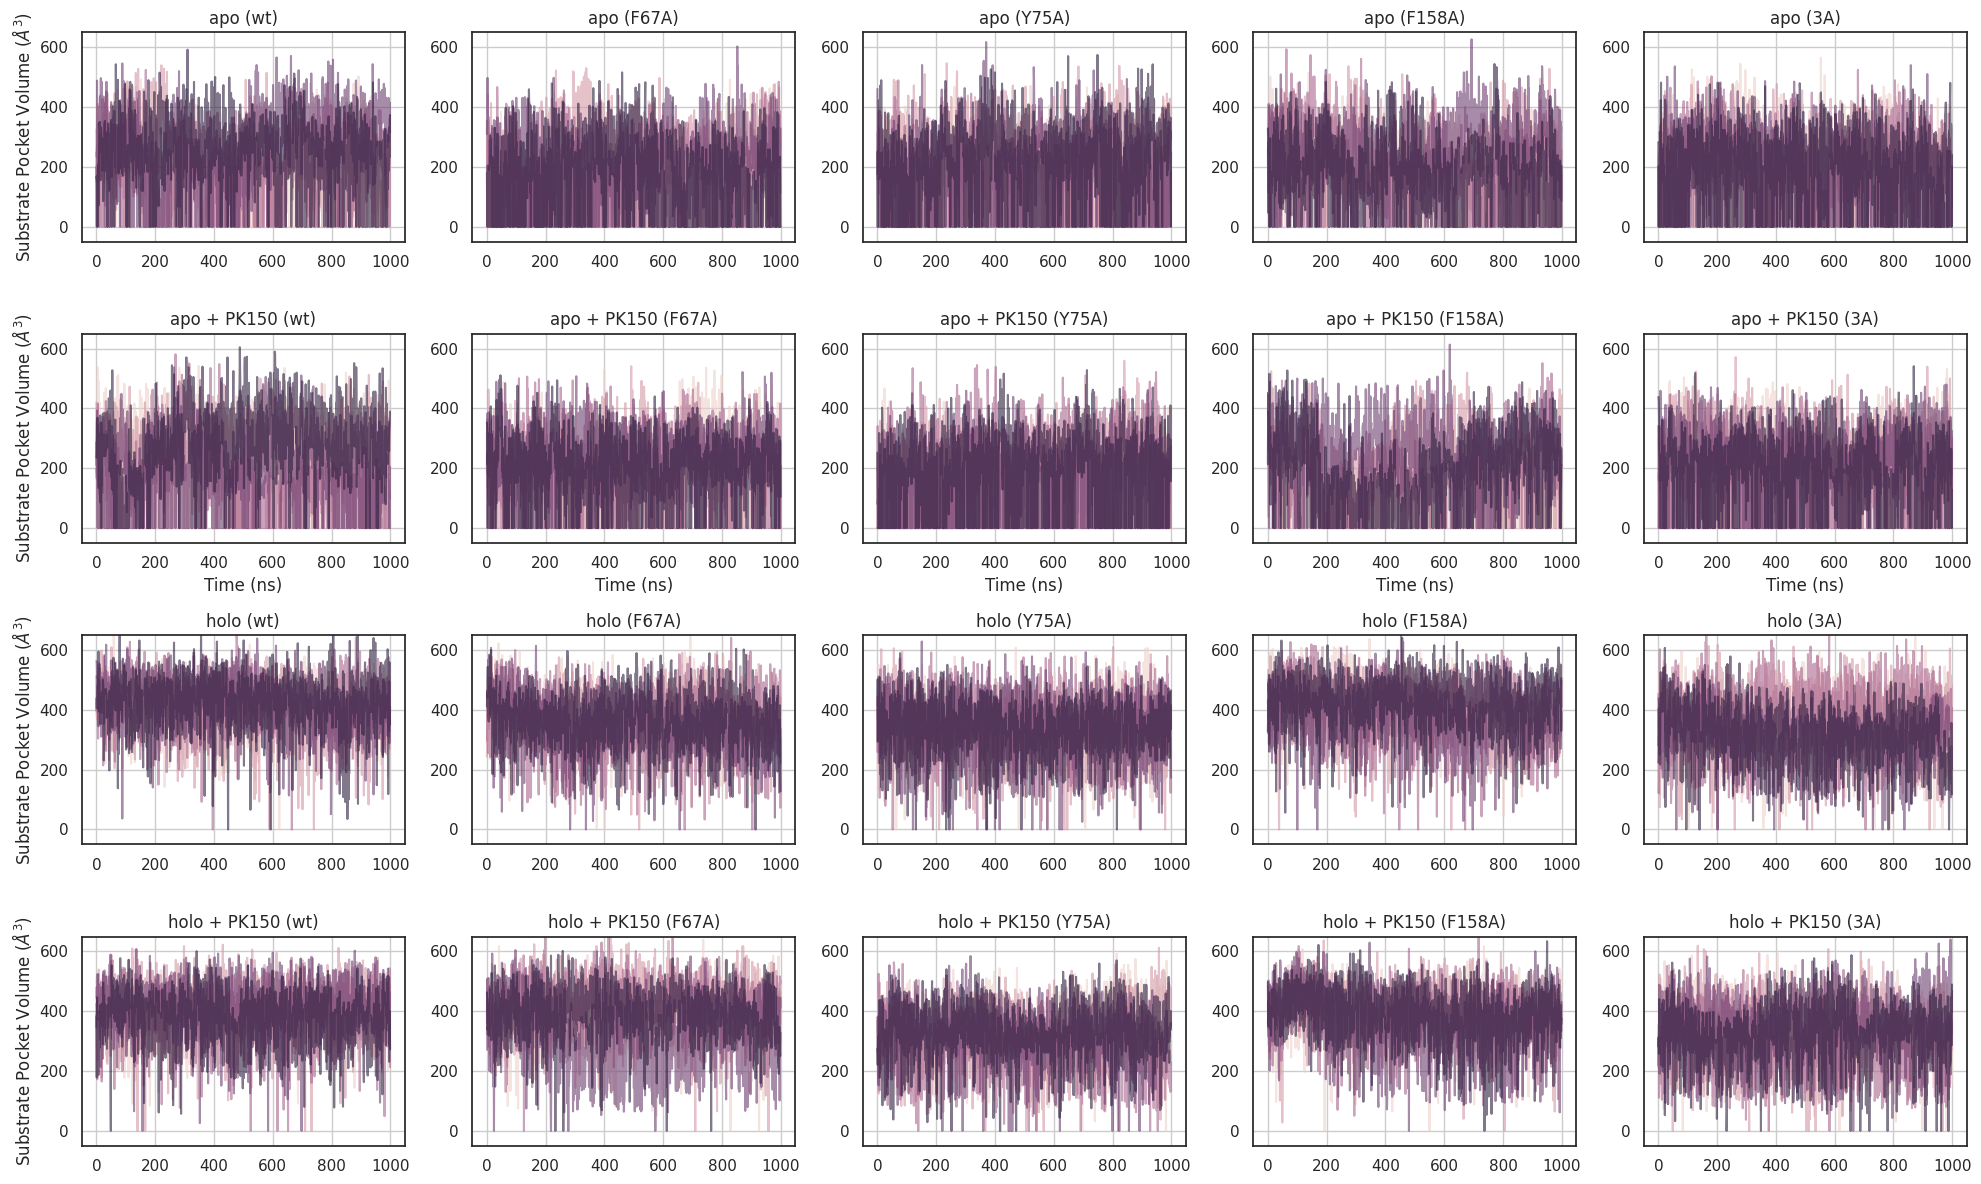

In [66]:
fig, axs = plt.subplots(4,5,figsize=(20,12))

ylabel = 'Substrate Pocket Volume ($\AA^3$)'
xlabel = 'Time (ns)'

systems = [df_R,df_RL,df_RS,df_RSL]
# systems = [df_RL,df_RSL]
mutations = ['wt','F67A','Y75A','F158A','3A']
titles = ['apo','apo + PK150','holo','holo + PK150']

for i_sys, sys in enumerate(systems):
    for i_mut, mut in enumerate(mutations):
        ax = axs[i_sys][i_mut]
        df = sys[sys['mutation']==mut]
        df = df[df.index < 1000]
        sns.lineplot(data=df, x=df.index, y='substrate_pocket', hue='run',ax=ax,legend=False,alpha=0.6)
        ax.grid()
        ax.set_title(titles[i_sys]+' ('+mut+')')
        if i_sys ==1:
            ax.set_xlabel(xlabel)
        else:
            ax.set_xlabel(None)
        if i_mut ==0: 
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel(None)        
        ax.set_ylim(-50,650)

plt.tight_layout()
filename='./SI_Substrate_pocket.png'
plt.savefig(filename,dpi=150)

### Catalytic hbond

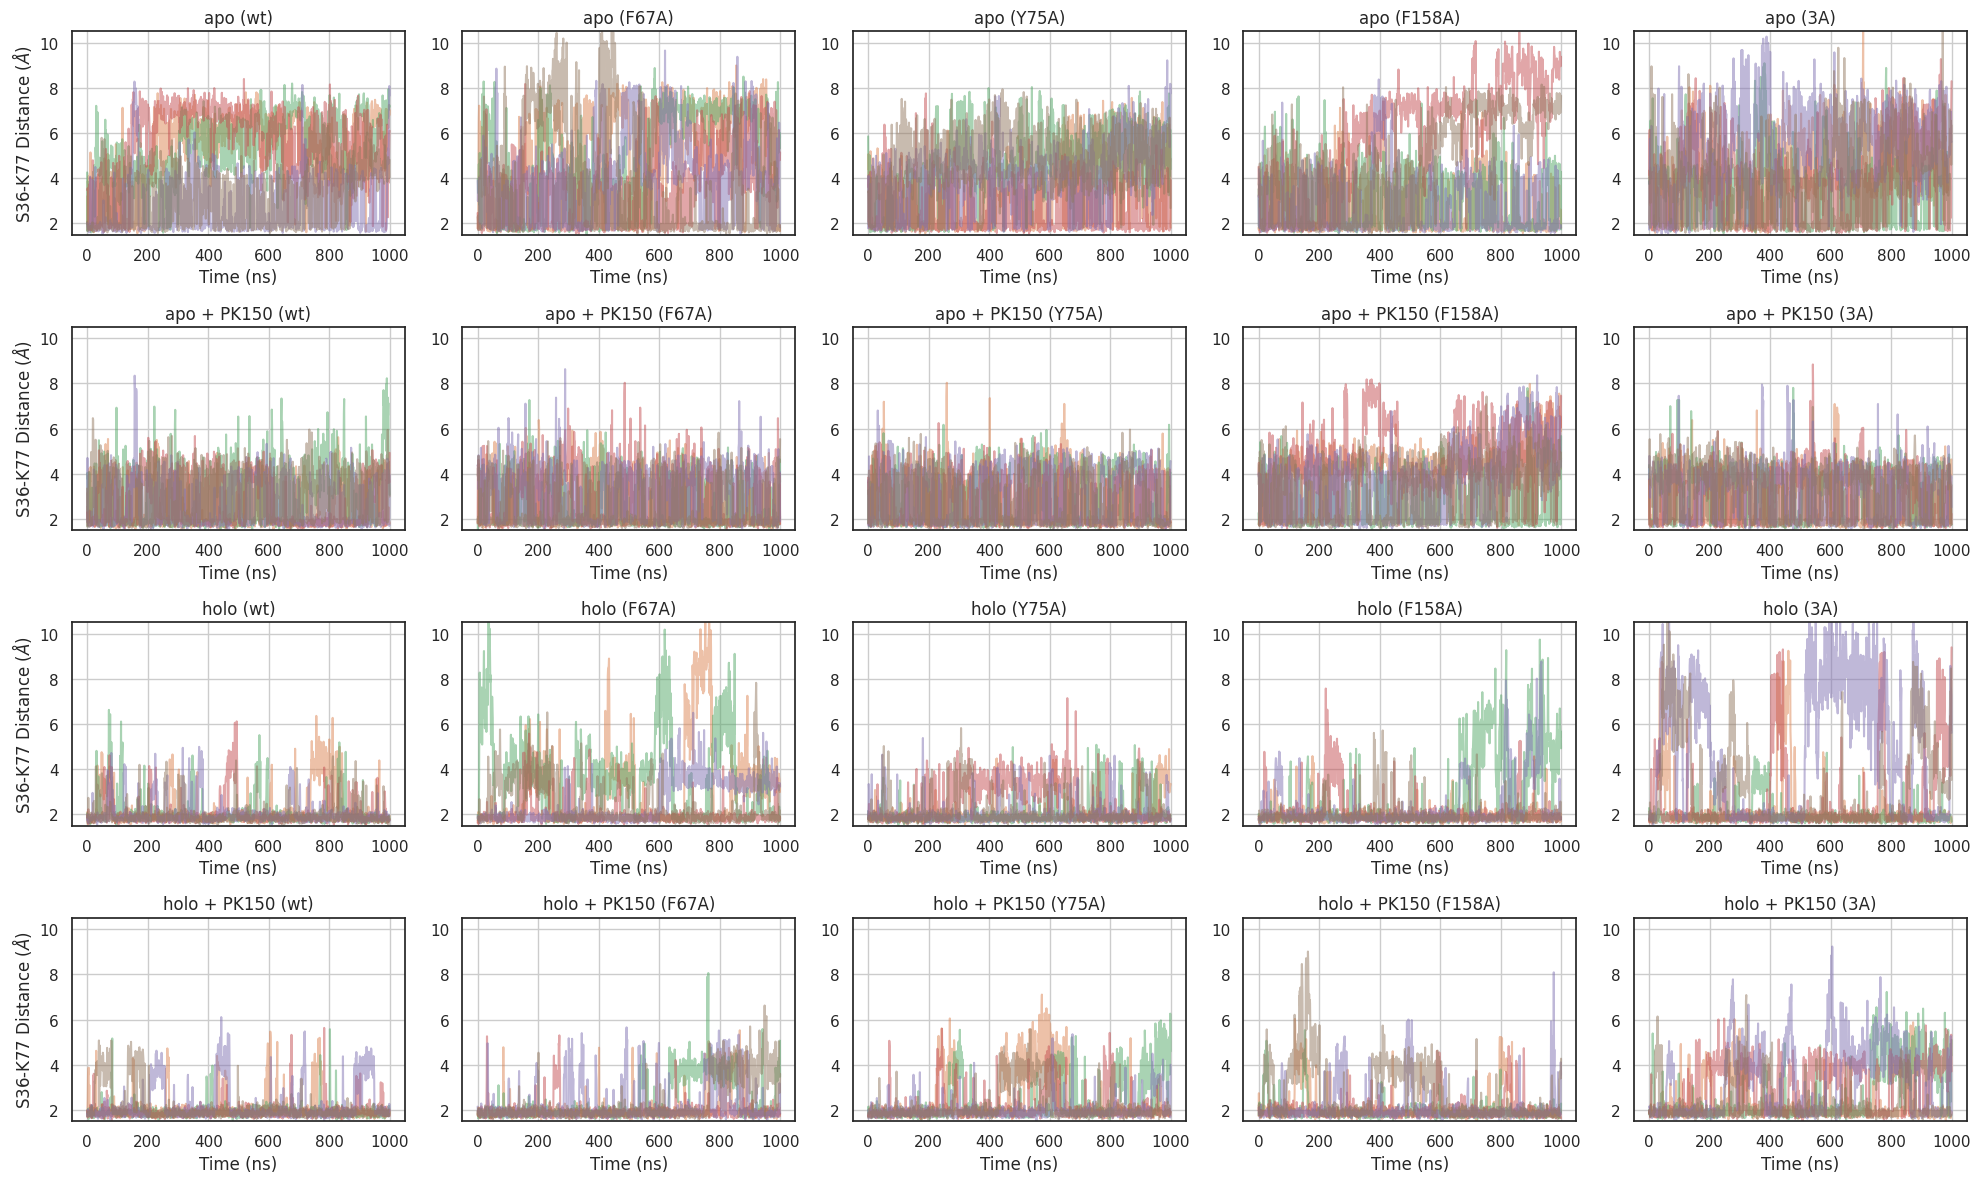

In [67]:
fig, axs = plt.subplots(4,5,figsize=(20,12))

ylabel = 'S36-K77 Distance ($\AA$)'
xlabel = 'Time (ns)'

systems = [df_R,df_RL,df_RS,df_RSL]
# systems = [df_RL,df_RSL]
mutations = ['wt','F67A','Y75A','F158A','3A']
titles = ['apo','apo + PK150','holo','holo + PK150']

for i_sys, sys in enumerate(systems):
    for i_mut, mut in enumerate(mutations):
        ax = axs[i_sys][i_mut]
        df = sys[sys['mutation']==mut]
        df = df[df.index < 1000]
        
        for run in range(1,6):
            df_ = df[df['run']==run]
            x = df_.index
            y = df_.distance_S36_K77.values
            # sns.lineplot(data=df, x=df.index, y='substrate_pocket', hue='run',ax=ax,legend=False,alpha=0.6)
            ax.plot(x,y,alpha=0.5,color='C'+str(run))
            
        # sns.lineplot(data=df, x=df.index, y='distance_S36_K77', hue='run',ax=ax,legend=False,alpha=0.6)
        ax.grid()
        ax.set_title(titles[i_sys]+' ('+mut+')')
        ax.set_xlabel(xlabel)

        if i_mut ==0: 
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel(None)        
        ax.set_ylim(1.5,10.5)

plt.tight_layout()
filename='./SI_hbond.png'
plt.savefig(filename,dpi=150)

## RMSF

In [68]:
mutations = ['wt','F67A','Y75A','F158A','3A']

### R

/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/shuchen/.conda/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

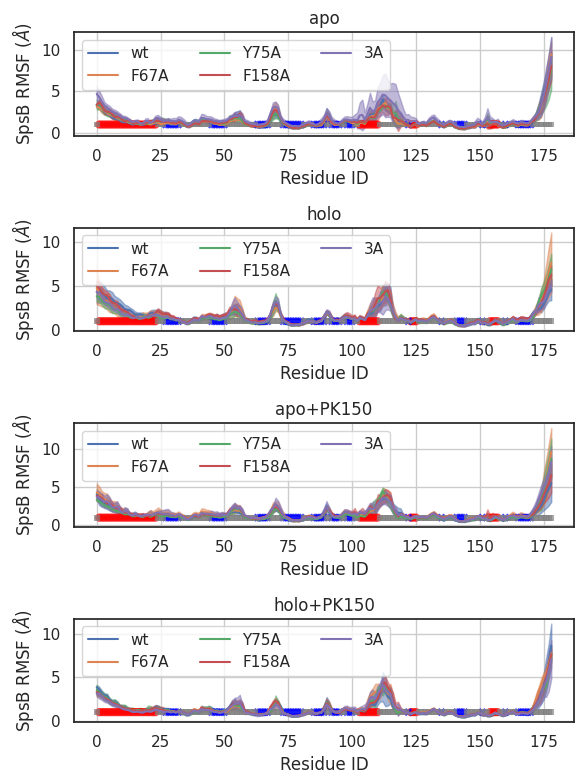

In [70]:
ylabel = 'SpsB RMSF ($\AA$)'

fig, axs = plt.subplots(4,1,figsize=(6,8))

titles = ['apo','holo','apo+PK150','holo+PK150']
for i_r, r in enumerate(results):
    for i_mut, mut in enumerate(mutations):
        rmsf = [d[:,1] for d in r[i_mut].RMSF_rec]
        avg, std = np.average(rmsf,axis=0), np.std(rmsf,axis=0)
        axs[i_r].plot(avg,color='C'+str(i_mut),label=mut)
        axs[i_r].fill_between(x=np.arange(len(avg)),y1=avg-std,y2=avg+std,alpha=0.5,color='C'+str(i_mut))
    axs[i_r].set_title(titles[i_r])
    sns.scatterplot(data= df_ss,legend=False,palette={0: 'red', 1: 'blue', 2: 'gray'},
                linewidth=0, alpha = 0.7, ax=axs[i_r])
    axs[i_r].set_ylabel(ylabel)
    axs[i_r].set_xlabel('Residue ID')
    axs[i_r].grid()
    axs[i_r].legend(ncol=3)
plt.tight_layout()
filename = './SI_receptor_RMSF.png'
plt.savefig(filename,dpi=150)

### S

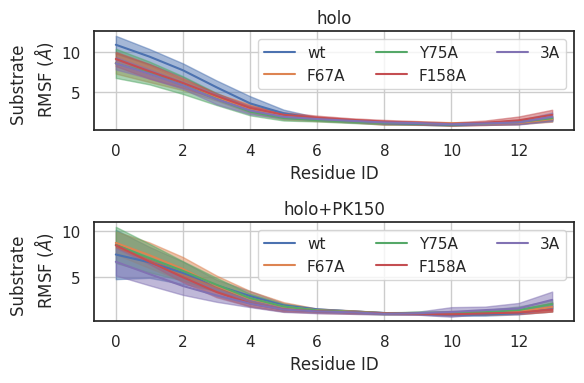

In [71]:
ylabel = 'Substrate \n RMSF ($\AA$)'

fig, axs = plt.subplots(2,1,figsize=(6,4))

titles = ['holo','holo+PK150']
for i_r, r in enumerate([results[1],results[3]]):
    for i_mut, mut in enumerate(mutations):
        rmsf = [d[:,1] for d in r[i_mut].RMSF_sub]
        avg, std = np.average(rmsf,axis=0), np.std(rmsf,axis=0)
        axs[i_r].plot(avg,color='C'+str(i_mut),label=mut)
        axs[i_r].fill_between(x=np.arange(len(avg)),y1=avg-std,y2=avg+std,alpha=0.5,color='C'+str(i_mut))
    axs[i_r].set_title(titles[i_r])
    axs[i_r].set_ylabel(ylabel)
    axs[i_r].grid()
    axs[i_r].legend(ncol=3)
    axs[i_r].set_xlabel('Residue ID')

plt.tight_layout()
filename = './substrate_RMSF.png'
plt.savefig(filename,dpi=150)